In [1]:
!pip install catboost
!wget -O dataset.csv https://dl.dropboxusercontent.com/scl/fi/2usv0cgs8b8nvsrzm1wzc/dataset.csv?rlkey=lzrfo3ybljo0py1pa87uavyce&st=dq6ifa97
!wget -O one_hot_encoded_df.csv https://dl.dropboxusercontent.com/scl/fi/dz6814az357d1mmr2pgzn/one_hot_encoded_df.csv?rlkey=xsx9lqfnl57opjjzf08cavkjm&st=2gk2y7ub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00
--2025-03-06 23:14:44--  https://dl.dropboxusercontent.com/scl/fi/2usv0cgs8b8nvsrzm1wzc/dataset.csv?rlkey=lzrfo3ybljo0py1pa87uavyce
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:601c:15::a27d:60f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.4.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1473510 (1.4M) [text/csv]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   1.40M  --.-KB/s    in 0.06s   

2025-03-06 23:14:45 (25.1 MB/s) - ‘dataset.csv’ saved [1473510/1473510]

--2025-03-06 23:14:45--  https://dl.dropboxusercontent.com/scl/fi/dz6814az357d1mmr2pgzn/one_hot_encoded_df.csv?rlkey=xsx9lqfnl57opjjzf08cavkjm
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:601c:15::a27d:60f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|16

# prepare

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Загрузка данных
data = pd.read_csv('dataset.csv')

# Удаление ненужных или пустых столбцов
data.dropna(axis=1, how='all', inplace=True)  # Удаляем столбцы, в которых все значения пустые

In [ ]:
data

Отметка времени  Ваш пол  \
0     19.03.2023 17:27:54  Мужской   
1     19.03.2023 17:28:04  Мужской   
2     19.03.2023 17:29:32  Мужской   
3     19.03.2023 17:36:02  Женский   
4     19.03.2023 17:36:53  Мужской   
...                   ...      ...   
1592  31.03.2023 18:46:00  Мужской   
1593  31.03.2023 19:01:20  Мужской   
1594  31.03.2023 23:30:41  Мужской   
1595  01.04.2023 20:50:09  Мужской   
1596  02.04.2023 16:05:15  Мужской   

      Сколько вам было лет на момент поступления   \
0                                              18   
1                                              18   
2                                              17   
3                                              17   
4                                              18   
...                                           ...   
1592                                           18   
1593                                           17   
1594                                           17   
1595                                           18   
1596                                           16   

     В каком городе вы проживали на момент поступления? Введите полное наименование города  \
0                                          Екатеринбург                                      
1                                                Москва                                      
2                                                Мосвка                                      
3                                                Мценск                                      
4                                               Саранск                                      
...                                                 ...                                      
1592                                            Москва                                       
1593                                           Владимир                                      
1594                               Комсомольск-на-Амуре                                      
1595                                             Москва                                      
1596                                          Таганрог                                       

     Поступаете после 11 класса или после колледжа  \
0                                  После 11 класса   
1                                  После 11 класса   
2                                  После 11 класса   
3                                  После 11 класса   
4                                  После 11 класса   
...                                            ...   
1592                               После 11 класса   
1593                               После 11 класса   
1594                               После 11 класса   
1595                               После 11 класса   
1596                               После 11 класса   

      Какой у вас был средний балл аттестата  \
0                                        5.0   
1                                        5.0   
2                                        4.0   
3                                        5.0   
4                                        4.5   
...                                      ...   
1592                                     4.0   
1593                                     4.5   
1594                                     4.5   
1595                                     4.0   
1596                                     4.0   

      Какие предметы вы любили и хотели изучать в школе  \
0     Математика, Астрономия, Обществознание, Информ...   
1     Математика, Иностранный язык, Физика, Информатика   
2             Математика, Иностранный язык, Информатика   
3             Математика, Иностранный язык, Информатика   
4          Математика, Литература, История, Информатика   
...                                                 ...   
1592                        Обществознание, Информатика   
1593  Русский язык, Иностранный язык, Физика, Астрон...   
1594  Математика, История, Хим

In [ ]:
data.columns

Index(['Отметка времени', 'Ваш пол',
       'Сколько вам было лет на момент поступления ',
       'В каком городе вы проживали на момент поступления? Введите полное наименование города',
       'Поступаете после 11 класса или после колледжа',
       'Какой у вас был средний балл аттестата',
       'Какие предметы вы любили и хотели изучать в школе',
       'Математика(Количество баллов)', 'Русский(Количество баллов)',
       'Первый предмет на выбор(Количество баллов)',
       'Второй предмет на выбор (Если не сдавали пропустите вопрос)',
       'Насколько хорошо вы знаете английский', 'Ваш факультет в ВУЗе',
       'Ваше направление',
       'Насколько вы довольны программой (или были довольны, если перевелись) выбранного направления. Очень просим дать объективный ответ именно по поводу программы обучения, не опираясь на личный опыт, преподавательский или студенческий состав!',
       'Насколько сильно вы хотели принимать участие в различных общественных, спортивных мероприятиях, и пр

In [ ]:
# Обработка пропусков в числовых столбцах
data['Сколько вам было лет на момент поступления '].fillna(data['Сколько вам было лет на момент поступления '].mean(), inplace=True)
data['Какой у вас был средний балл аттестата'].fillna(data['Какой у вас был средний балл аттестата'].mean(), inplace=True)

# Обработка пропусков в категориальных данных
data['Ваш пол'].fillna(data['Ваш пол'].mode()[0], inplace=True)  # Заполняем наиболее часто встречаемым значением

<ipython-input-6-35c66a5dacbd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Сколько вам было лет на момент поступления '].fillna(data['Сколько вам было лет на момент поступления '].mean(), inplace=True)
<ipython-input-6-35c66a5dacbd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [ ]:
data

Отметка времени  Ваш пол  \
0     19.03.2023 17:27:54  Мужской   
1     19.03.2023 17:28:04  Мужской   
2     19.03.2023 17:29:32  Мужской   
3     19.03.2023 17:36:02  Женский   
4     19.03.2023 17:36:53  Мужской   
...                   ...      ...   
1592  31.03.2023 18:46:00  Мужской   
1593  31.03.2023 19:01:20  Мужской   
1594  31.03.2023 23:30:41  Мужской   
1595  01.04.2023 20:50:09  Мужской   
1596  02.04.2023 16:05:15  Мужской   

      Сколько вам было лет на момент поступления   \
0                                              18   
1                                              18   
2                                              17   
3                                              17   
4                                              18   
...                                           ...   
1592                                           18   
1593                                           17   
1594                                           17   
1595                                           18   
1596                                           16   

     В каком городе вы проживали на момент поступления? Введите полное наименование города  \
0                                          Екатеринбург                                      
1                                                Москва                                      
2                                                Мосвка                                      
3                                                Мценск                                      
4                                               Саранск                                      
...                                                 ...                                      
1592                                            Москва                                       
1593                                           Владимир                                      
1594                               Комсомольск-на-Амуре                                      
1595                                             Москва                                      
1596                                          Таганрог                                       

     Поступаете после 11 класса или после колледжа  \
0                                  После 11 класса   
1                                  После 11 класса   
2                                  После 11 класса   
3                                  После 11 класса   
4                                  После 11 класса   
...                                            ...   
1592                               После 11 класса   
1593                               После 11 класса   
1594                               После 11 класса   
1595                               После 11 класса   
1596                               После 11 класса   

      Какой у вас был средний балл аттестата  \
0                                        5.0   
1                                        5.0   
2                                        4.0   
3                                        5.0   
4                                        4.5   
...                                      ...   
1592                                     4.0   
1593                                     4.5   
1594                                     4.5   
1595                                     4.0   
1596                                     4.0   

      Какие предметы вы любили и хотели изучать в школе  \
0     Математика, Астрономия, Обществознание, Информ...   
1     Математика, Иностранный язык, Физика, Информатика   
2             Математика, Иностранный язык, Информатика   
3             Математика, Иностранный язык, Информатика   
4          Математика, Литература, История, Информатика   
...                                                 ...   
1592                        Обществознание, Информатика   
1593  Русский язык, Иностранный язык, Физика, Астрон...   
1594  Математика, История, Хим

In [ ]:
data.drop(columns=['Отметка времени'], inplace=True)

In [ ]:
data.rename(columns={
    'Ваш пол': 'gender',
    'Сколько вам было лет на момент поступления ': 'age_at_enrollment',
    'В каком городе вы проживали на момент поступления? Введите полное наименование города': 'city_of_residence',
    'Поступаете после 11 класса или после колледжа': 'enroll_after_hs_or_college',
    'Какой у вас был средний балл аттестата': 'avg_high_school_score',
    'Какие предметы вы любили и хотели изучать в школе': 'favorite_subjects',
    'Какие предметы были углубленными': 'advanced_subjects',
    'Ваш факультет в ВУЗе': 'university_faculty',
    'Ваше направление': 'field_of_study',
    'Насколько вы довольны программой (или были довольны, если перевелись) выбранного направления. Очень просим дать объективный ответ именно по поводу программы обучения, не опираясь на личный опыт, преподавательский или студенческий состав!': 'program_satisfaction',
    'Насколько сильно вы хотели принимать участие в различных общественных, спортивных мероприятиях, и прочих внеучебных активностях': 'interest_in_extracurriculars',
    'Насколько вы спортивный человек': 'sportiness',
    'Насколько вам было важно поступить на бюджет': 'importance_of_budget_admission',
    'Ходили ли вы на день открытых дверей в МТУСИ': 'visited_open_day',
    'Как вы оцениваете свои способности в самоорганизации учебного процесса': 'self_organization_ability',
    'Занимались ли вы с репетиторами во время обучения в старших классах': 'tutoring_experience',
    'Какие дополнительные предметы (помимо математики и русского языка) вы сдавали на ЕГЭ': 'additional_subjects_on_exams',
    'Были ли у вас успехи в олимпиадах по техническим предметам серьезного уровня (региональные и выше) в старших классах': 'olympiad_success',
    'Чем из перечисленного ниже вы интересовались до поступления в университет': 'pre_university_interests',
    'Как много времени вы готовы уделять на саморазвитие в интересующей вас предметной области? (Помимо учебных часов)': 'time_for_self_development'
}, inplace=True)

In [ ]:
data.rename(columns={
    'Первый предмет на выбор(Количество баллов)': 'first_choice_subject_score',
    'Второй предмет на выбор (Если не сдавали пропустите вопрос)': 'second_choice_subject_score',
    'Насколько хорошо вы знаете английский': 'english_proficiency',
    'Математика(Количество баллов)': 'math_score',
    'Русский(Количество баллов)': 'russian_score',
    'Углубленное изучение каких предметов у вас было в школе(Если не было, пропустите вопрос)': 'advanced_subjects_in_school',
    'Как много времени вы готовы уделять на саморазвитие в интересующей вас предметной области? (Помимо учебных часов) ': 'time_for_self_development',
    'Как вы поступали?': 'admission_method'
}, inplace=True)

In [ ]:
data.columns

Index(['gender', 'age_at_enrollment', 'city_of_residence',
       'enroll_after_hs_or_college', 'avg_high_school_score',
       'favorite_subjects', 'math_score', 'russian_score',
       'first_choice_subject_score', 'second_choice_subject_score',
       'english_proficiency', 'university_faculty', 'field_of_study',
       'program_satisfaction', 'interest_in_extracurriculars', 'sportiness',
       'importance_of_budget_admission', 'visited_open_day',
       'self_organization_ability', 'tutoring_experience',
       'advanced_subjects_in_school', 'additional_subjects_on_exams',
       'olympiad_success', 'pre_university_interests',
       'time_for_self_development', 'admission_method'],
      dtype='object')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
data

gender  age_at_enrollment     city_of_residence  \
0     Мужской                 18          Екатеринбург   
1     Мужской                 18                Москва   
2     Мужской                 17                Мосвка   
3     Женский                 17                Мценск   
4     Мужской                 18               Саранск   
...       ...                ...                   ...   
1592  Мужской                 18               Москва    
1593  Мужской                 17              Владимир   
1594  Мужской                 17  Комсомольск-на-Амуре   
1595  Мужской                 18                Москва   
1596  Мужской                 16             Таганрог    

     enroll_after_hs_or_college  avg_high_school_score  \
0               После 11 класса                    5.0   
1               После 11 класса                    5.0   
2               После 11 класса                    4.0   
3               После 11 класса                    5.0   
4               После 11 класса                    4.5   
...                         ...                    ...   
1592            После 11 класса                    4.0   
1593            После 11 класса                    4.5   
1594            После 11 класса                    4.5   
1595            После 11 класса                    4.0   
1596            После 11 класса                    4.0   

                                      favorite_subjects math_score  \
0     Математика, Астрономия, Обществознание, Информ...         82   
1     Математика, Иностранный язык, Физика, Информатика         84   
2             Математика, Иностранный язык, Информатика         86   
3             Математика, Иностранный язык, Информатика         80   
4          Математика, Литература, История, Информатика         56   
...                                                 ...        ...   
1592                        Обществознание, Информатика         46   
1593  Русский язык, Иностранный язык, Физика, Астрон...         74   
1594  Математика, История, Химия, Биология, Общество...         76   
1595                       Математика, Иностранный язык         71   
1596      Иностранный язык, Обществознание, Информатика         74   

     russian_score first_choice_subject_score second_choice_subject_score  \
0               98                         93                         NaN   
1               96                         84                          82   
2               86                         88                         NaN   
3               96                         75                         NaN   
4               64                         53                         NaN   
...            ...                        ...                         ...   
1592            65                         68                         NaN   
1593            88                         70                          75   
1594            76                        NaN                         NaN   
1595            72                         39                         NaN   
1596            85             информатика 88                     англ 59   

                                    english_proficiency  \
0                Могу общаться в повседневных ситуациях   
1                Могу общаться в повседневных ситуациях   
2     Могу коммуницировать с носителями, частично зн...   
3                Могу общаться в повседневных ситуациях   
4                         Могу читать несложные диалоги   
...                                                 ...   
1592             Могу общаться в повседневных ситуациях   
1593  Могу коммуницировать с носителями, частично зн...   
1594  Могу коммуницировать с носителями, частично зн...   
1595             Могу общаться в повседневных ситуациях   
1596  Могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ИТ (Информационные технологии)   
1                     

In [ ]:
data['city_of_residence'] = data['city_of_residence'].astype(str)

data['city_of_residence'] = data['city_of_residence'].str.lower()
data['city_of_residence'] = data['city_of_residence'].str.replace('г.', '', regex=False)
data['city_of_residence'] = data['city_of_residence'].str.strip()

data.city_of_residence.value_counts()

city_of_residence
москва                                  625
балашиха                                 37
люберцы                                  18
чебоксары                                15
подольск                                 15
                                       ... 
город саров по нижегородской области      1
муром                                     1
городской округ лобня                     1
село шарапово                             1
шумерля, чувашская республика             1
Name: count, Length: 377, dtype: int64

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
data.city_of_residence.value_counts()

city_of_residence
москва                                  625
балашиха                                 37
люберцы                                  18
чебоксары                                15
подольск                                 15
                                       ... 
город саров по нижегородской области      1
муром                                     1
городской округ лобня                     1
село шарапово                             1
шумерля, чувашская республика             1
Name: count, Length: 377, dtype: int64

In [ ]:
data

gender  age_at_enrollment     city_of_residence  \
0     Мужской                 18          екатеринбург   
1     Мужской                 18                москва   
2     Мужской                 17                мосвка   
3     Женский                 17                мценск   
4     Мужской                 18               саранск   
...       ...                ...                   ...   
1592  Мужской                 18                москва   
1593  Мужской                 17              владимир   
1594  Мужской                 17  комсомольск-на-амуре   
1595  Мужской                 18                москва   
1596  Мужской                 16              таганрог   

     enroll_after_hs_or_college  avg_high_school_score  \
0               После 11 класса                    5.0   
1               После 11 класса                    5.0   
2               После 11 класса                    4.0   
3               После 11 класса                    5.0   
4               После 11 класса                    4.5   
...                         ...                    ...   
1592            После 11 класса                    4.0   
1593            После 11 класса                    4.5   
1594            После 11 класса                    4.5   
1595            После 11 класса                    4.0   
1596            После 11 класса                    4.0   

                                      favorite_subjects math_score  \
0     Математика, Астрономия, Обществознание, Информ...         82   
1     Математика, Иностранный язык, Физика, Информатика         84   
2             Математика, Иностранный язык, Информатика         86   
3             Математика, Иностранный язык, Информатика         80   
4          Математика, Литература, История, Информатика         56   
...                                                 ...        ...   
1592                        Обществознание, Информатика         46   
1593  Русский язык, Иностранный язык, Физика, Астрон...         74   
1594  Математика, История, Химия, Биология, Общество...         76   
1595                       Математика, Иностранный язык         71   
1596      Иностранный язык, Обществознание, Информатика         74   

     russian_score first_choice_subject_score second_choice_subject_score  \
0               98                         93                         NaN   
1               96                         84                          82   
2               86                         88                         NaN   
3               96                         75                         NaN   
4               64                         53                         NaN   
...            ...                        ...                         ...   
1592            65                         68                         NaN   
1593            88                         70                          75   
1594            76                        NaN                         NaN   
1595            72                         39                         NaN   
1596            85             информатика 88                     англ 59   

                                    english_proficiency  \
0                Могу общаться в повседневных ситуациях   
1                Могу общаться в повседневных ситуациях   
2     Могу коммуницировать с носителями, частично зн...   
3                Могу общаться в повседневных ситуациях   
4                         Могу читать несложные диалоги   
...                                                 ...   
1592             Могу общаться в повседневных ситуациях   
1593  Могу коммуницировать с носителями, частично зн...   
1594  Могу коммуницировать с носителями, частично зн...   
1595             Могу общаться в повседневных ситуациях   
1596  Могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ИТ (Информационные технологии)   
1                     

In [ ]:
data['math_score'] = data['math_score'].replace({r'[^\d.]': ''}, regex=True)

# Преобразуем значения в числовой формат, а если не удастся — удалим строки
data['math_score'] = pd.to_numeric(data['math_score'], errors='coerce')

# Удалим строки с некорректными значениями (NaN)
data.dropna(subset=['math_score'], inplace=True)

In [ ]:
data = data[(data['math_score'] >= 0) & (data['math_score'] <= 100)]

In [ ]:
data

gender  age_at_enrollment     city_of_residence  \
0     Мужской                 18          екатеринбург   
1     Мужской                 18                москва   
2     Мужской                 17                мосвка   
3     Женский                 17                мценск   
4     Мужской                 18               саранск   
...       ...                ...                   ...   
1592  Мужской                 18                москва   
1593  Мужской                 17              владимир   
1594  Мужской                 17  комсомольск-на-амуре   
1595  Мужской                 18                москва   
1596  Мужской                 16              таганрог   

     enroll_after_hs_or_college  avg_high_school_score  \
0               После 11 класса                    5.0   
1               После 11 класса                    5.0   
2               После 11 класса                    4.0   
3               После 11 класса                    5.0   
4               После 11 класса                    4.5   
...                         ...                    ...   
1592            После 11 класса                    4.0   
1593            После 11 класса                    4.5   
1594            После 11 класса                    4.5   
1595            После 11 класса                    4.0   
1596            После 11 класса                    4.0   

                                      favorite_subjects  math_score  \
0     Математика, Астрономия, Обществознание, Информ...        82.0   
1     Математика, Иностранный язык, Физика, Информатика        84.0   
2             Математика, Иностранный язык, Информатика        86.0   
3             Математика, Иностранный язык, Информатика        80.0   
4          Математика, Литература, История, Информатика        56.0   
...                                                 ...         ...   
1592                        Обществознание, Информатика        46.0   
1593  Русский язык, Иностранный язык, Физика, Астрон...        74.0   
1594  Математика, История, Химия, Биология, Общество...        76.0   
1595                       Математика, Иностранный язык        71.0   
1596      Иностранный язык, Обществознание, Информатика        74.0   

     russian_score first_choice_subject_score second_choice_subject_score  \
0               98                         93                         NaN   
1               96                         84                          82   
2               86                         88                         NaN   
3               96                         75                         NaN   
4               64                         53                         NaN   
...            ...                        ...                         ...   
1592            65                         68                         NaN   
1593            88                         70                          75   
1594            76                        NaN                         NaN   
1595            72                         39                         NaN   
1596            85             информатика 88                     англ 59   

                                    english_proficiency  \
0                Могу общаться в повседневных ситуациях   
1                Могу общаться в повседневных ситуациях   
2     Могу коммуницировать с носителями, частично зн...   
3                Могу общаться в повседневных ситуациях   
4                         Могу читать несложные диалоги   
...                                                 ...   
1592             Могу общаться в повседневных ситуациях   
1593  Могу коммуницировать с носителями, частично зн...   
1594  Могу коммуницировать с носителями, частично зн...   
1595             Могу общаться в повседневных ситуациях   
1596  Могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ИТ (Информационные технологии)   
1         

In [ ]:
data['russian_score'].replace({r'[^\d.]': ''}, regex=True, inplace=True)
data['russian_score'] = pd.to_numeric(data['russian_score'], errors='coerce')
data.dropna(subset=['russian_score'], inplace=True)
data = data[(data['russian_score'] >= 0) & (data['russian_score'] <= 100)]

<ipython-input-21-6408ce1035df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['russian_score'].replace({r'[^\d.]': ''}, regex=True, inplace=True)
<ipython-input-21-6408ce1035df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['russian_score'].replace({r'[^\d.]': ''}, regex=True, inplace=True)
<ipython-input-21-6408ce1035df>:2: Se

In [ ]:
data

gender  age_at_enrollment     city_of_residence  \
0     Мужской                 18          екатеринбург   
1     Мужской                 18                москва   
2     Мужской                 17                мосвка   
3     Женский                 17                мценск   
4     Мужской                 18               саранск   
...       ...                ...                   ...   
1592  Мужской                 18                москва   
1593  Мужской                 17              владимир   
1594  Мужской                 17  комсомольск-на-амуре   
1595  Мужской                 18                москва   
1596  Мужской                 16              таганрог   

     enroll_after_hs_or_college  avg_high_school_score  \
0               После 11 класса                    5.0   
1               После 11 класса                    5.0   
2               После 11 класса                    4.0   
3               После 11 класса                    5.0   
4               После 11 класса                    4.5   
...                         ...                    ...   
1592            После 11 класса                    4.0   
1593            После 11 класса                    4.5   
1594            После 11 класса                    4.5   
1595            После 11 класса                    4.0   
1596            После 11 класса                    4.0   

                                      favorite_subjects  math_score  \
0     Математика, Астрономия, Обществознание, Информ...        82.0   
1     Математика, Иностранный язык, Физика, Информатика        84.0   
2             Математика, Иностранный язык, Информатика        86.0   
3             Математика, Иностранный язык, Информатика        80.0   
4          Математика, Литература, История, Информатика        56.0   
...                                                 ...         ...   
1592                        Обществознание, Информатика        46.0   
1593  Русский язык, Иностранный язык, Физика, Астрон...        74.0   
1594  Математика, История, Химия, Биология, Общество...        76.0   
1595                       Математика, Иностранный язык        71.0   
1596      Иностранный язык, Обществознание, Информатика        74.0   

      russian_score first_choice_subject_score second_choice_subject_score  \
0              98.0                         93                         NaN   
1              96.0                         84                          82   
2              86.0                         88                         NaN   
3              96.0                         75                         NaN   
4              64.0                         53                         NaN   
...             ...                        ...                         ...   
1592           65.0                         68                         NaN   
1593           88.0                         70                          75   
1594           76.0                        NaN                         NaN   
1595           72.0                         39                         NaN   
1596           85.0             информатика 88                     англ 59   

                                    english_proficiency  \
0                Могу общаться в повседневных ситуациях   
1                Могу общаться в повседневных ситуациях   
2     Могу коммуницировать с носителями, частично зн...   
3                Могу общаться в повседневных ситуациях   
4                         Могу читать несложные диалоги   
...                                                 ...   
1592             Могу общаться в повседневных ситуациях   
1593  Могу коммуницировать с носителями, частично зн...   
1594  Могу коммуницировать с носителями, частично зн...   
1595             Могу общаться в повседневных ситуациях   
1596  Могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ИТ (Информационные технологии)  

In [ ]:
# Удалим любые текстовые символы в столбцах "first_choice_subject_score" и "second_choice_subject_score"
data['first_choice_subject_score'] = data['first_choice_subject_score'].replace({r'[^\d.]': ''}, regex=True)
data['second_choice_subject_score'] = data['second_choice_subject_score'].replace({r'[^\d.]': ''}, regex=True)

<ipython-input-23-9dd710acc9a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_choice_subject_score'] = data['first_choice_subject_score'].replace({r'[^\d.]': ''}, regex=True)
<ipython-input-23-9dd710acc9a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['second_choice_subject_score'] = data['second_choice_subject_score'].replace({r'[^\d.]': ''}, regex=True)


In [ ]:
data['first_choice_subject_score'] = pd.to_numeric(data['first_choice_subject_score'], errors='coerce')
data['second_choice_subject_score'] = pd.to_numeric(data['second_choice_subject_score'], errors='coerce')

<ipython-input-24-fe4b065b9b8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_choice_subject_score'] = pd.to_numeric(data['first_choice_subject_score'], errors='coerce')
<ipython-input-24-fe4b065b9b8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['second_choice_subject_score'] = pd.to_numeric(data['second_choice_subject_score'], errors='coerce')


In [ ]:
data = data[(data['first_choice_subject_score'].isna()) |
                    ((data['first_choice_subject_score'] >= 0) & (data['first_choice_subject_score'] <= 100))]
data = data[(data['second_choice_subject_score'].isna()) |
                    ((data['second_choice_subject_score'] >= 0) & (data['second_choice_subject_score'] <= 100))]

In [ ]:
data.dropna(subset=['first_choice_subject_score'], inplace=True)

In [ ]:
data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0     Мужской                 18      екатеринбург            После 11 класса   
1     Мужской                 18            москва            После 11 класса   
2     Мужской                 17            мосвка            После 11 класса   
3     Женский                 17            мценск            После 11 класса   
4     Мужской                 18           саранск            После 11 класса   
...       ...                ...               ...                        ...   
1591  Мужской                 18            москва            После 11 класса   
1592  Мужской                 18            москва            После 11 класса   
1593  Мужской                 17          владимир            После 11 класса   
1595  Мужской                 18            москва            После 11 класса   
1596  Мужской                 16          таганрог            После 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1591                    4.5   
1592                    4.0   
1593                    4.5   
1595                    4.0   
1596                    4.0   

                                      favorite_subjects  math_score  \
0     Математика, Астрономия, Обществознание, Информ...        82.0   
1     Математика, Иностранный язык, Физика, Информатика        84.0   
2             Математика, Иностранный язык, Информатика        86.0   
3             Математика, Иностранный язык, Информатика        80.0   
4          Математика, Литература, История, Информатика        56.0   
...                                                 ...         ...   
1591               Математика, Химия, Физика, География        84.0   
1592                        Обществознание, Информатика        46.0   
1593  Русский язык, Иностранный язык, Физика, Астрон...        74.0   
1595                       Математика, Иностранный язык        71.0   
1596      Иностранный язык, Обществознание, Информатика        74.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          NaN   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          NaN   
3              96.0                        75.0                          NaN   
4              64.0                        53.0                          NaN   
...             ...                         ...                          ...   
1591           39.0                        85.0                          NaN   
1592           65.0                        68.0                          NaN   
1593           88.0                        70.0                         75.0   
1595           72.0                        39.0                          NaN   
1596           85.0                        88.0                         59.0   

                                    english_proficiency  \
0                Могу общаться в повседневных ситуациях   
1                Могу общаться в повседневных ситуациях   
2     Могу коммуницировать с носителями, частично зн...   
3                Могу общаться в повседневных ситуациях   
4                         Могу читать несложные диалоги   
...                                                 ...   
1591                      Могу читать несложные диалоги   
1592             Могу общаться в повседневных ситуациях   
1593  Могу коммуницировать с носителями, частично зн...   
1595             Могу общаться в повседневных ситуациях   
1596  Могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ИТ (Информационные технологии)   
1                     

In [ ]:
# Приведем все текстовые значения в нижний регистр перед заменой
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Теперь заменим "да" на True, "нет" на False и пол на 0 и 1
data = data.replace({'да': True, 'нет': False})

# # Заменим значения в столбце "пол" на 0 для женщин и 1 для мужчин
# data['gender'] = data['gender'].replace({'женский': 0, 'мужской': 1})

<ipython-input-28-6343496c0a60>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-28-6343496c0a60>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'да': True, 'нет': False})


In [ ]:
data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0     мужской                 18      екатеринбург            после 11 класса   
1     мужской                 18            москва            после 11 класса   
2     мужской                 17            мосвка            после 11 класса   
3     женский                 17            мценск            после 11 класса   
4     мужской                 18           саранск            после 11 класса   
...       ...                ...               ...                        ...   
1591  мужской                 18            москва            после 11 класса   
1592  мужской                 18            москва            после 11 класса   
1593  мужской                 17          владимир            после 11 класса   
1595  мужской                 18            москва            после 11 класса   
1596  мужской                 16          таганрог            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1591                    4.5   
1592                    4.0   
1593                    4.5   
1595                    4.0   
1596                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1591               математика, химия, физика, география        84.0   
1592                        обществознание, информатика        46.0   
1593  русский язык, иностранный язык, физика, астрон...        74.0   
1595                       математика, иностранный язык        71.0   
1596      иностранный язык, обществознание, информатика        74.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          NaN   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          NaN   
3              96.0                        75.0                          NaN   
4              64.0                        53.0                          NaN   
...             ...                         ...                          ...   
1591           39.0                        85.0                          NaN   
1592           65.0                        68.0                          NaN   
1593           88.0                        70.0                         75.0   
1595           72.0                        39.0                          NaN   
1596           85.0                        88.0                         59.0   

                                    english_proficiency  \
0                могу общаться в повседневных ситуациях   
1                могу общаться в повседневных ситуациях   
2     могу коммуницировать с носителями, частично зн...   
3                могу общаться в повседневных ситуациях   
4                         могу читать несложные диалоги   
...                                                 ...   
1591                      могу читать несложные диалоги   
1592             могу общаться в повседневных ситуациях   
1593  могу коммуницировать с носителями, частично зн...   
1595             могу общаться в повседневных ситуациях   
1596  могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ит (информационные технологии)   
1                     

In [ ]:
data.to_csv('data_for_gpt.csv', index=False)

In [ ]:
data['admission_method'] = data['admission_method'].fillna('баллы егэ')

In [ ]:
data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17            мосвка            после 11 класса   
3          0                 17            мценск            после 11 класса   
4          1                 18           саранск            после 11 класса   
...      ...                ...               ...                        ...   
1591       1                 18            москва            после 11 класса   
1592       1                 18            москва            после 11 класса   
1593       1                 17          владимир            после 11 класса   
1595       1                 18            москва            после 11 класса   
1596       1                 16          таганрог            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1591                    4.5   
1592                    4.0   
1593                    4.5   
1595                    4.0   
1596                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1591               математика, химия, физика, география        84.0   
1592                        обществознание, информатика        46.0   
1593  русский язык, иностранный язык, физика, астрон...        74.0   
1595                       математика, иностранный язык        71.0   
1596      иностранный язык, обществознание, информатика        74.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          NaN   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          NaN   
3              96.0                        75.0                          NaN   
4              64.0                        53.0                          NaN   
...             ...                         ...                          ...   
1591           39.0                        85.0                          NaN   
1592           65.0                        68.0                          NaN   
1593           88.0                        70.0                         75.0   
1595           72.0                        39.0                          NaN   
1596           85.0                        88.0                         59.0   

                                    english_proficiency  \
0                могу общаться в повседневных ситуациях   
1                могу общаться в повседневных ситуациях   
2     могу коммуницировать с носителями, частично зн...   
3                могу общаться в повседневных ситуациях   
4                         могу читать несложные диалоги   
...                                                 ...   
1591                      могу читать несложные диалоги   
1592             могу общаться в повседневных ситуациях   
1593  могу коммуницировать с носителями, частично зн...   
1595             могу общаться в повседневных ситуациях   
1596  могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ит (информационные технологии)   
1                       ит (инфор

In [ ]:
data[data.drop(columns=['second_choice_subject_score']).isna().any(axis=1)]

gender  age_at_enrollment          city_of_residence  \
8          0                 17  краснодарский край,  сочи   
13         0                 17                    дедовск   
18         0                 18                      пенза   
19         1                 17                  раменское   
21         1                 18                  жуковский   
...      ...                ...                        ...   
1579       1                 17                     москва   
1580       1                 18                     москва   
1585       1                 21                  кызыл кия   
1588       1                 18                     москва   
1590       1                 17                    алатырь   

     enroll_after_hs_or_college  avg_high_school_score  \
8               после 11 класса                    5.0   
13              после 11 класса                    5.0   
18              после 11 класса                    4.5   
19              после 11 класса                    4.0   
21              после 11 класса                    4.0   
...                         ...                    ...   
1579            после 11 класса                    4.5   
1580            после 11 класса                    4.0   
1585             после колледжа                    4.5   
1588            после 11 класса                    4.5   
1590            после 11 класса                    4.0   

                                      favorite_subjects  math_score  \
8                          химия, биология, информатика        72.0   
13                иностранный язык, физика, информатика        74.0   
18     математика, история, обществознание, информатика        80.0   
19               иностранный язык, история, информатика        63.0   
21                                     иностранный язык        62.0   
...                                                 ...         ...   
1579                            математика, информатика        72.0   
1580                            математика, информатика        64.0   
1585                                             физика       100.0   
1588  русский язык, математика, иностранный язык, ис...        60.0   
1590                                        информатика        58.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
8              98.0                        81.0                          NaN   
13             98.0                        95.0                         93.0   
18             84.0                        88.0                          NaN   
19             63.0                        75.0                          NaN   
21             80.0                        70.0                          NaN   
...             ...                         ...                          ...   
1579           66.0                        29.0                         62.0   
1580           72.0                        43.0                          NaN   
1585           81.0                       100.0                          NaN   
1588           73.0                        43.0                          NaN   
1590           53.0                        54.0                          NaN   

                                    english_proficiency  \
8                могу общаться в повседневных ситуациях   
13    могу коммуницировать с носителями, частично зн...   
18                        могу читать несложные диалоги   
19               могу общаться в повседневных ситуациях   
21                        могу читать несложные диалоги   
...                                                 ...   
1579                      могу читать несложные диалоги   
1580             знаю примерно на уровне носителя языка   
1585                      могу читать несложные диалоги   
1588  могу коммуницировать с носителями, частично зн...   
1590             могу общаться в повседневных ситуациях   

                                    unive

In [ ]:
# Заменим NaN на "unknown" в столбцах "advanced_subjects_in_school" и "pre_university_interests"
data['pre_university_interests'].fillna('unknown', inplace=True)
data['advanced_subjects_in_school'].fillna('unknown', inplace=True)

<ipython-input-34-39a029ac25f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pre_university_interests'].fillna('unknown', inplace=True)
<ipython-input-34-39a029ac25f9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
data['additional_subjects_on_exams'].fillna('unknown', inplace=True)

<ipython-input-35-1fd276d0229f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['additional_subjects_on_exams'].fillna('unknown', inplace=True)


In [ ]:
data['second_choice_subject_score'].fillna(0.0, inplace=True)

<ipython-input-36-2fb014678c77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['second_choice_subject_score'].fillna(0.0, inplace=True)


In [ ]:
data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17            мосвка            после 11 класса   
3          0                 17            мценск            после 11 класса   
4          1                 18           саранск            после 11 класса   
...      ...                ...               ...                        ...   
1591       1                 18            москва            после 11 класса   
1592       1                 18            москва            после 11 класса   
1593       1                 17          владимир            после 11 класса   
1595       1                 18            москва            после 11 класса   
1596       1                 16          таганрог            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1591                    4.5   
1592                    4.0   
1593                    4.5   
1595                    4.0   
1596                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1591               математика, химия, физика, география        84.0   
1592                        обществознание, информатика        46.0   
1593  русский язык, иностранный язык, физика, астрон...        74.0   
1595                       математика, иностранный язык        71.0   
1596      иностранный язык, обществознание, информатика        74.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          0.0   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          0.0   
3              96.0                        75.0                          0.0   
4              64.0                        53.0                          0.0   
...             ...                         ...                          ...   
1591           39.0                        85.0                          0.0   
1592           65.0                        68.0                          0.0   
1593           88.0                        70.0                         75.0   
1595           72.0                        39.0                          0.0   
1596           85.0                        88.0                         59.0   

                                    english_proficiency  \
0                могу общаться в повседневных ситуациях   
1                могу общаться в повседневных ситуациях   
2     могу коммуницировать с носителями, частично зн...   
3                могу общаться в повседневных ситуациях   
4                         могу читать несложные диалоги   
...                                                 ...   
1591                      могу читать несложные диалоги   
1592             могу общаться в повседневных ситуациях   
1593  могу коммуницировать с носителями, частично зн...   
1595             могу общаться в повседневных ситуациях   
1596  могу коммуницировать с носителями, частично зн...   

                                    university_faculty  \
0                       ит (информационные технологии)   
1                       ит (инфор

In [ ]:
data.to_csv('cleared_data_dump.csv')

# one hot

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('cleared_data_dump.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17            мосвка            после 11 класса   
3          0                 17              орёл            после 11 класса   
4          1                 18           саранск            после 11 класса   
...      ...                ...               ...                        ...   
1365       1                 18            москва            после 11 класса   
1366       1                 18            москва            после 11 класса   
1367       1                 17          владимир            после 11 класса   
1368       1                 18            москва            после 11 класса   
1369       1                 16          таганрог            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1365                    4.5   
1366                    4.0   
1367                    4.5   
1368                    4.0   
1369                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1365               математика, химия, физика, география        84.0   
1366                        обществознание, информатика        46.0   
1367  русский язык, иностранный язык, физика, астрон...        74.0   
1368                       математика, иностранный язык        71.0   
1369      иностранный язык, обществознание, информатика        74.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          0.0   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          0.0   
3              96.0                        75.0                          0.0   
4              64.0                        53.0                          0.0   
...             ...                         ...                          ...   
1365           39.0                        85.0                          0.0   
1366           65.0                        68.0                          0.0   
1367           88.0                        70.0                         75.0   
1368           72.0                        39.0                          0.0   
1369           85.0                        88.0                         59.0   

      ... visited_open_day                          self_organization_ability  \
0     ...            False   готов почитать несколько статей по теме предмета   
1     ...            False   готов почитать несколько статей по теме предмета   
2     ...            False   готов почитать несколько статей по теме предмета   
3     ...            False   готов почитать несколько статей по теме предмета   
4     ...            False   готов почитать несколько статей по теме предмета   
...   ...              ...                                                ...   
1365  ...            False   готов почитать несколько статей по теме предмета   
1366  ...             True  максимум - выполнение дома заданий от преподав...   
1367  ...            False   готов почитать несколько статей по теме предмета   
1368  ...             True   готов почитать неск

In [20]:
city_counts = data['city_of_residence'].value_counts()

rare_cities = city_counts[city_counts < 5].index
data['city_of_residence'] = data['city_of_residence'].apply(lambda x: 'other' if x in rare_cities else x)

In [21]:
data = data[(data["age_at_enrollment"] != 12) & (data["age_at_enrollment"] != 27) & (data["age_at_enrollment"] != 16)]

In [22]:
data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17             other            после 11 класса   
3          0                 17              орёл            после 11 класса   
4          1                 18             other            после 11 класса   
...      ...                ...               ...                        ...   
1364       1                 17             other            после 11 класса   
1365       1                 18            москва            после 11 класса   
1366       1                 18            москва            после 11 класса   
1367       1                 17          владимир            после 11 класса   
1368       1                 18            москва            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1364                    4.0   
1365                    4.5   
1366                    4.0   
1367                    4.5   
1368                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1364                                        информатика        58.0   
1365               математика, химия, физика, география        84.0   
1366                        обществознание, информатика        46.0   
1367  русский язык, иностранный язык, физика, астрон...        74.0   
1368                       математика, иностранный язык        71.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          0.0   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          0.0   
3              96.0                        75.0                          0.0   
4              64.0                        53.0                          0.0   
...             ...                         ...                          ...   
1364           53.0                        54.0                          0.0   
1365           39.0                        85.0                          0.0   
1366           65.0                        68.0                          0.0   
1367           88.0                        70.0                         75.0   
1368           72.0                        39.0                          0.0   

      ... visited_open_day                          self_organization_ability  \
0     ...            False   готов почитать несколько статей по теме предмета   
1     ...            False   готов почитать несколько статей по теме предмета   
2     ...            False   готов почитать несколько статей по теме предмета   
3     ...            False   готов почитать несколько статей по теме предмета   
4     ...            False   готов почитать несколько статей по теме предмета   
...   ...              ...                                                ...   
1364  ...            False   готов почитать несколько статей по теме предмета   
1365  ...            False   готов почитать несколько статей по теме предмета   
1366  ...             True  максимум - выполнение дома заданий от преподав...   
1367  ...            False   готов почитать неск

In [42]:
new_data = data.drop(["field_of_study"], axis=1)

In [43]:
pd.options.display.max_rows = 100

In [44]:
cat_features = [
    "city_of_residence",
    "enroll_after_hs_or_college", "favorite_subjects", "english_proficiency",
    # "university_faculty",
    "interest_in_extracurriculars", "sportiness",
    "importance_of_budget_admission",
    "self_organization_ability", "advanced_subjects_in_school",
    "additional_subjects_on_exams", "pre_university_interests",
    "time_for_self_development",
    "admission_method",
    # "age_group"
]

In [45]:
new_data["subjects_count"] = new_data["second_choice_subject_score"].apply( lambda x: 3 if x < 1 else 4)
new_data["balls_count"] = (new_data["math_score"] + new_data["russian_score"] + new_data["first_choice_subject_score"] + new_data["second_choice_subject_score"])
new_data["avg_balls_count"] = round(new_data["balls_count"] / new_data["subjects_count"])

In [46]:
new_data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17             other            после 11 класса   
3          0                 17              орёл            после 11 класса   
4          1                 18             other            после 11 класса   
...      ...                ...               ...                        ...   
1364       1                 17             other            после 11 класса   
1365       1                 18            москва            после 11 класса   
1366       1                 18            москва            после 11 класса   
1367       1                 17          владимир            после 11 класса   
1368       1                 18            москва            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1364                    4.0   
1365                    4.5   
1366                    4.0   
1367                    4.5   
1368                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1364                                        информатика        58.0   
1365               математика, химия, физика, география        84.0   
1366                        обществознание, информатика        46.0   
1367  русский язык, иностранный язык, физика, астрон...        74.0   
1368                       математика, иностранный язык        71.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          0.0   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          0.0   
3              96.0                        75.0                          0.0   
4              64.0                        53.0                          0.0   
...             ...                         ...                          ...   
1364           53.0                        54.0                          0.0   
1365           39.0                        85.0                          0.0   
1366           65.0                        68.0                          0.0   
1367           88.0                        70.0                         75.0   
1368           72.0                        39.0                          0.0   

      ...       advanced_subjects_in_school additional_subjects_on_exams  \
0     ...                математика, физика                  информатика   
1     ...   математика, физика, информатика          физика, информатика   
2     ...  иностранный язык, обществознание                  информатика   
3     ...   математика, физика, информатика                  информатика   
4     ...           математика, информатика                  информатика   
...   ...                               ...                          ...   
1364  ...                           unknown          физика, информатика   
1365  ...                математика, физика                       физика   
1366  ...           математика, информатика                  информатика   
1367  ...               физика, информатика          физика, информатика   
1368  ...             

In [47]:
def custom_binarize(df, columns):
    for col in columns:
        unique_values = set()

        # Собираем все уникальные значения
        df[col].dropna().apply(lambda x: unique_values.update((y.strip() for y in x.split(',') if y != 'unknown')))

        print(unique_values)

        # Создаём отдельные бинарные признаки
        for val in unique_values:
            df[f"{col}_{val.strip()}"] = df[col].apply(lambda x: 1 if pd.notna(x) and val in map(str.strip, x.split(',')) else 0)

        # Удаляем исходный столбец
        df.drop(columns=[col], inplace=True)

    return df

columns_to_binarize = [
    "favorite_subjects",
    "advanced_subjects_in_school",
    "additional_subjects_on_exams",
    "pre_university_interests"
]

new_data = custom_binarize(new_data, columns_to_binarize)

{'русский язык', 'астрономия', 'иностранный язык', 'информатика', 'химия', 'физика', 'литература', 'история', 'математика', 'география', 'обществознание', 'биология'}
{'русский язык', 'астрономия', 'иностранный язык', 'обществознание', 'химия', 'физика', 'литература', 'история', 'математика', 'география', 'информатика', 'биология'}
{'астрономия', 'иностранный язык', 'обществознание', 'химия', 'физика', 'литература', 'история', 'география', 'информатика', 'биология'}
{'компьютерное 3d-моделирование', 'инженерная деятельность', 'программирование', 'робототехника', 'эксперименты (лабораторные опыты) связанные с химией/физикой'}


In [13]:
new_data["importance_of_budget_admission"].value_counts()

importance_of_budget_admission
обязательно         725
важно               377
не очень важно      129
не принципиально    127
Name: count, dtype: int64

In [14]:
new_data["importance_of_budget_admission"] = new_data["importance_of_budget_admission"].apply(lambda x: True if x in ["обязательно", "важно"] else False)

In [15]:
new_data

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17             other            после 11 класса   
3          0                 17              орёл            после 11 класса   
4          1                 18             other            после 11 класса   
...      ...                ...               ...                        ...   
1364       1                 17             other            после 11 класса   
1365       1                 18            москва            после 11 класса   
1366       1                 18            москва            после 11 класса   
1367       1                 17          владимир            после 11 класса   
1368       1                 18            москва            после 11 класса   

      avg_high_school_score  \
0                       5.0   
1                       5.0   
2                       4.0   
3                       5.0   
4                       4.5   
...                     ...   
1364                    4.0   
1365                    4.5   
1366                    4.0   
1367                    4.5   
1368                    4.0   

                                      favorite_subjects  math_score  \
0     математика, астрономия, обществознание, информ...        82.0   
1     математика, иностранный язык, физика, информатика        84.0   
2             математика, иностранный язык, информатика        86.0   
3             математика, иностранный язык, информатика        80.0   
4          математика, литература, история, информатика        56.0   
...                                                 ...         ...   
1364                                        информатика        58.0   
1365               математика, химия, физика, география        84.0   
1366                        обществознание, информатика        46.0   
1367  русский язык, иностранный язык, физика, астрон...        74.0   
1368                       математика, иностранный язык        71.0   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0              98.0                        93.0                          0.0   
1              96.0                        84.0                         82.0   
2              86.0                        88.0                          0.0   
3              96.0                        75.0                          0.0   
4              64.0                        53.0                          0.0   
...             ...                         ...                          ...   
1364           53.0                        54.0                          0.0   
1365           39.0                        85.0                          0.0   
1366           65.0                        68.0                          0.0   
1367           88.0                        70.0                         75.0   
1368           72.0                        39.0                          0.0   

      ...       advanced_subjects_in_school additional_subjects_on_exams  \
0     ...                математика, физика                  информатика   
1     ...   математика, физика, информатика          физика, информатика   
2     ...  иностранный язык, обществознание                  информатика   
3     ...   математика, физика, информатика                  информатика   
4     ...           математика, информатика                  информатика   
...   ...                               ...                          ...   
1364  ...                           unknown          физика, информатика   
1365  ...                математика, физика                       физика   
1366  ...           математика, информатика                  информатика   
1367  ...               физика, информатика          физика, информатика   
1368  ...             

In [ ]:
pd.options.display.max_columns = 0

In [48]:
for column in columns_to_binarize:
  cat_features.remove(column)

In [49]:
new_data_encoded = pd.get_dummies(new_data, columns=cat_features)

In [31]:
new_data_encoded = new_data[:]

In [32]:
new_data_encoded

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1                 18      екатеринбург            после 11 класса   
1          1                 18            москва            после 11 класса   
2          1                 17             other            после 11 класса   
3          0                 17              орёл            после 11 класса   
4          1                 18             other            после 11 класса   
...      ...                ...               ...                        ...   
1364       1                 17             other            после 11 класса   
1365       1                 18            москва            после 11 класса   
1366       1                 18            москва            после 11 класса   
1367       1                 17          владимир            после 11 класса   
1368       1                 18            москва            после 11 класса   

      avg_high_school_score  math_score  russian_score  \
0                       5.0        82.0           98.0   
1                       5.0        84.0           96.0   
2                       4.0        86.0           86.0   
3                       5.0        80.0           96.0   
4                       4.5        56.0           64.0   
...                     ...         ...            ...   
1364                    4.0        58.0           53.0   
1365                    4.5        84.0           39.0   
1366                    4.0        46.0           65.0   
1367                    4.5        74.0           88.0   
1368                    4.0        71.0           72.0   

      first_choice_subject_score  second_choice_subject_score  \
0                           93.0                          0.0   
1                           84.0                         82.0   
2                           88.0                          0.0   
3                           75.0                          0.0   
4                           53.0                          0.0   
...                          ...                          ...   
1364                        54.0                          0.0   
1365                        85.0                          0.0   
1366                        68.0                          0.0   
1367                        70.0                         75.0   
1368                        39.0                          0.0   

                                    english_proficiency  ...  \
0                могу общаться в повседневных ситуациях  ...   
1                могу общаться в повседневных ситуациях  ...   
2     могу коммуницировать с носителями, частично зн...  ...   
3                могу общаться в повседневных ситуациях  ...   
4                         могу читать несложные диалоги  ...   
...                                                 ...  ...   
1364             могу общаться в повседневных ситуациях  ...   
1365                      могу читать несложные диалоги  ...   
1366             могу общаться в повседневных ситуациях  ...   
1367  могу коммуницировать с носителями, частично зн...  ...   
1368             могу общаться в повседневных ситуациях  ...   

     additional_subjects_on_exams_литература  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
1364                                       0   
1365                                       0   
1366                                       0   
1367                                       0   
1368                                       0   

      additional_subjects_on_exams_история  \
0                                        0   
1                                        0   
2                                        0   
3                                    

In [50]:
# Преобразуем True/False в 1/0 по всему датасету
new_data_encoded = new_data_encoded.replace({True: 1, False: 0})

new_data_encoded.head()

<ipython-input-50-1e4f0a5726ee>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data_encoded = new_data_encoded.replace({True: 1, False: 0})


gender  age_at_enrollment  avg_high_school_score  math_score  \
0       1                 18                    5.0        82.0   
1       1                 18                    5.0        84.0   
2       1                 17                    4.0        86.0   
3       0                 17                    5.0        80.0   
4       1                 18                    4.5        56.0   

   russian_score  first_choice_subject_score  second_choice_subject_score  \
0           98.0                        93.0                          0.0   
1           96.0                        84.0                         82.0   
2           86.0                        88.0                          0.0   
3           96.0                        75.0                          0.0   
4           64.0                        53.0                          0.0   

               university_faculty  program_satisfaction  visited_open_day  \
0  ит (информационные технологии)                     7                 0   
1  ит (информационные технологии)                     8                 0   
2  ит (информационные технологии)                     4                 0   
3  ит (информационные технологии)                     7                 0   
4  ит (информационные технологии)                     8                 0   

   ...  time_for_self_development_больше 10 часов в неделю  \
0  ...                                                  1    
1  ...                                                  1    
2  ...                                                  0    
3  ...                                                  1    
4  ...                                                  1    

   time_for_self_development_минимальное количество времени  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

  time_for_self_development_несколько часов в неделю  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   time_for_self_development_около 10 часов в неделю  \
0                                                  0   
1                                                  0   
2                                                  1   
3                                                  0   
4                                                  0   

   admission_method_баллы егэ  admission_method_вступительные испытания  \
0                           1                                         0   
1                           1                                         0   
2                           1                                         0   
3                           1                                         0   
4                           1                                         0   

   admission_method_другое  admission_method_квота  \
0                        0                       0   
1                        0                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   admission_method_олимпиада  admission_method_целевое обучение  
0                           0                                  0  
1                           0                                  0  
2                           0                                  0  
3                           0                                  0  
4                           0                                  0  

[5 rows x 152 columns]

# Модель

In [34]:
new_data_encoded["university_faculty"].value_counts()

university_faculty
ит (информационные технологии)                        651
кииб (кибернетика и информационная безопасность)      289
сисс (сети и системы связи)                           191
рит (радио и телевидение)                             154
цэимк (цифровая экономика и массовые коммуникации)     73
Name: count, dtype: int64

In [35]:
new_data_encoded["age_at_enrollment"].value_counts()

age_at_enrollment
18    782
17    471
19     56
20     31
21     11
22      5
23      2
Name: count, dtype: int64

In [51]:
import pandas as pd

from catboost import CatBoostClassifier
from sklearn.ensemble import IsolationForest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [52]:
X = new_data_encoded.drop(columns=['university_faculty'])
y = new_data_encoded['university_faculty']

In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numeric_columns = [col for col in X.columns if not set(X[col].unique()).issubset({0, 1}) and col != 'id' and col not in cat_features]

scaler = StandardScaler()
X_scaled = new_data_encoded.copy()

X_scaled[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

gender  age_at_enrollment  avg_high_school_score  math_score  \
0          1           0.275139               1.305214    0.867812   
1          1           0.275139               1.305214    1.008552   
2          1          -1.013272              -1.026997    1.149292   
3          0          -1.013272               1.305214    0.727072   
4          1           0.275139               0.139108   -0.961811   
...      ...                ...                    ...         ...   
1364       1          -1.013272              -1.026997   -0.821071   
1365       1           0.275139               0.139108    1.008552   
1366       1           0.275139              -1.026997   -1.665512   
1367       1          -1.013272               0.139108    0.304851   
1368       1           0.275139              -1.026997    0.093740   

      russian_score  first_choice_subject_score  second_choice_subject_score  \
0          1.744461                    1.410513                    -0.675902   
1          1.561507                    0.807699                     1.741576   
2          0.646738                    1.075616                    -0.675902   
3          1.561507                    0.204884                    -0.675902   
4         -1.365755                   -1.268663                    -0.675902   
...             ...                         ...                          ...   
1364      -2.372001                   -1.201684                    -0.675902   
1365      -3.652678                    0.874678                    -0.675902   
1366      -1.274278                   -0.263972                    -0.675902   
1367       0.829692                   -0.130013                     1.535206   
1368      -0.633939                   -2.206375                    -0.675902   

      program_satisfaction  visited_open_day  tutoring_experience  ...  \
0                 0.464946                 0                    1  ...   
1                 0.951760                 0                    1  ...   
2                -0.995494                 0                    1  ...   
3                 0.464946                 0                    0  ...   
4                 0.951760                 0                    1  ...   
...                    ...               ...                  ...  ...   
1364             -0.508681                 0                    1  ...   
1365             -0.995494                 0                    0  ...   
1366              0.951760                 1                    1  ...   
1367              0.464946                 0                    1  ...   
1368              0.464946                 1                    0  ...   

      time_for_self_development_больше 10 часов в неделю  \
0                                                     1    
1                                                     1    
2                                                     0    
3                                                     1    
4                                                     1    
...                                                 ...    
1364                                                  0    
1365                                                  0    
1366                                                  1    
1367                                                  0    
1368                                                  0    

     time_for_self_development_минимальное количество времени  \
0                                                     0         
1                                                     0         
2                                                     0         
3                                                     0         
4                                                     0         
...                                                 ...         
1364                                                  0         
1365                                                  0         
1366     

In [41]:
X_scaled_df

gender  age_at_enrollment city_of_residence enroll_after_hs_or_college  \
0          1           0.275139      екатеринбург            после 11 класса   
1          1           0.275139            москва            после 11 класса   
2          1          -1.013272             other            после 11 класса   
3          0          -1.013272              орёл            после 11 класса   
4          1           0.275139             other            после 11 класса   
...      ...                ...               ...                        ...   
1364       1          -1.013272             other            после 11 класса   
1365       1           0.275139            москва            после 11 класса   
1366       1           0.275139            москва            после 11 класса   
1367       1          -1.013272          владимир            после 11 класса   
1368       1           0.275139            москва            после 11 класса   

      avg_high_school_score  math_score  russian_score  \
0                  1.305214    0.867812       1.744461   
1                  1.305214    1.008552       1.561507   
2                 -1.026997    1.149292       0.646738   
3                  1.305214    0.727072       1.561507   
4                  0.139108   -0.961811      -1.365755   
...                     ...         ...            ...   
1364              -1.026997   -0.821071      -2.372001   
1365               0.139108    1.008552      -3.652678   
1366              -1.026997   -1.665512      -1.274278   
1367               0.139108    0.304851       0.829692   
1368              -1.026997    0.093740      -0.633939   

      first_choice_subject_score  second_choice_subject_score  \
0                       1.410513                    -0.675902   
1                       0.807699                     1.741576   
2                       1.075616                    -0.675902   
3                       0.204884                    -0.675902   
4                      -1.268663                    -0.675902   
...                          ...                          ...   
1364                   -1.201684                    -0.675902   
1365                    0.874678                    -0.675902   
1366                   -0.263972                    -0.675902   
1367                   -0.130013                     1.535206   
1368                   -2.206375                    -0.675902   

                                    english_proficiency  ...  \
0                могу общаться в повседневных ситуациях  ...   
1                могу общаться в повседневных ситуациях  ...   
2     могу коммуницировать с носителями, частично зн...  ...   
3                могу общаться в повседневных ситуациях  ...   
4                         могу читать несложные диалоги  ...   
...                                                 ...  ...   
1364             могу общаться в повседневных ситуациях  ...   
1365                      могу читать несложные диалоги  ...   
1366             могу общаться в повседневных ситуациях  ...   
1367  могу коммуницировать с носителями, частично зн...  ...   
1368             могу общаться в повседневных ситуациях  ...   

      additional_subjects_on_exams_литература  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
1364                                        0   
1365                                        0   
1366                                        0   
1367                                        0   
1368                                        0   

     additional_subjects_on_exams_история  \
0                                       0   
1                                       0   
2                                       0   
3                            

# TSNE

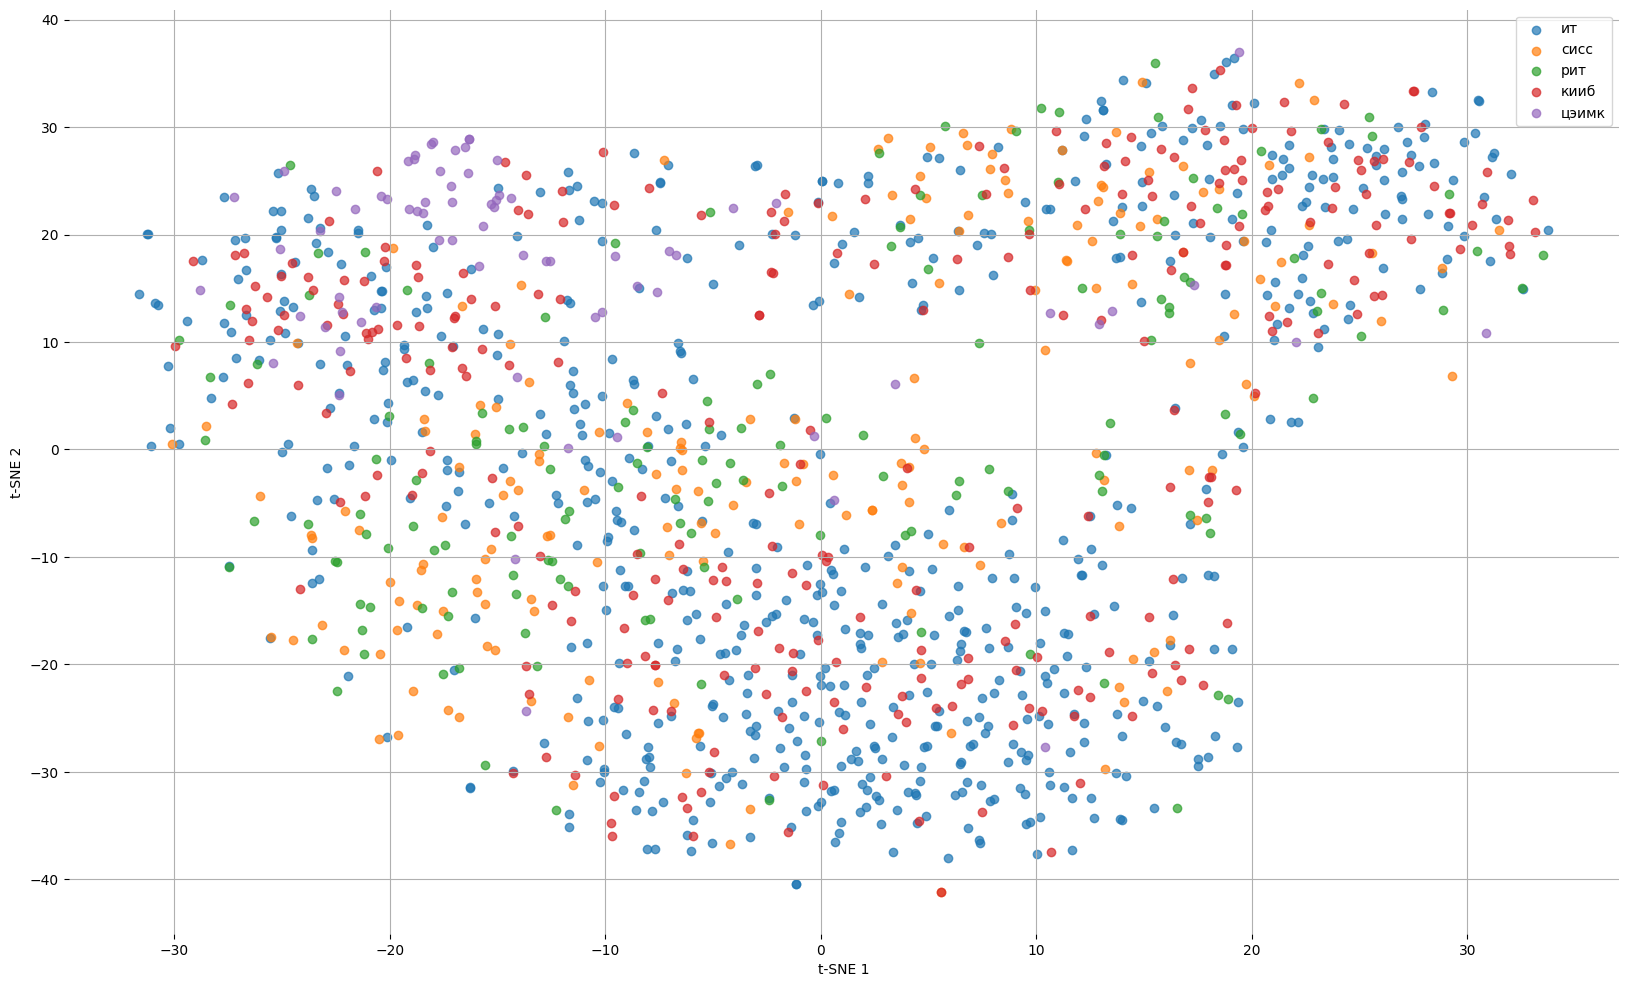

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

features = X_scaled_df.drop(["id", "subjects_count"], axis=1)
target = [m.split()[0] for m in y]

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(features)

df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
df_tsne['field_of_study'] = target

plt.figure(figsize=(20, 12))
for label in df_tsne['field_of_study'].unique():
    subset = df_tsne[df_tsne['field_of_study'] == label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=label, alpha=0.7)

# plt.xticks([])
# plt.yticks([])
plt.box(False)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# plt.title('t-SNE визуализация')
plt.legend()
plt.grid()
plt.show()

In [55]:
X_scaled_df.to_csv('scaled.csv', index=False)

# edu

In [56]:
X = X[:]
y = y[:]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
y.value_counts()

university_faculty
ит (информационные технологии)                        651
кииб (кибернетика и информационная безопасность)      289
сисс (сети и системы связи)                           191
рит (радио и телевидение)                             154
цэимк (цифровая экономика и массовые коммуникации)     73
Name: count, dtype: int64

In [66]:
params = {
    "iterations": [500, 1000, 2000, 3000, 4000],
    "l2_leaf_reg": [None, 1, 2, 5, 10, 20, 50],
    "depth": [2, 4, 6, 8],
    "learning_rate": [0.1, 0.01, 0.001]
}

In [73]:
for iter in [500, 1000, 2000]:
    for depth in [2, 4, 6]:
      for min_samples_split in [6, 8, 10]:
        for min_samples_leaf in [1, 2, 4]:
          print(f"{iter=} {depth=} {min_samples_split=} {min_samples_leaf=}")
          # model = CatBoostClassifier(
          #     loss_function='MultiClass',
          #     random_state=42,
          #     verbose=0,
          #     iterations=iter,
          #     max_depth=depth,
          #     l2_leaf_reg=l2_leaf_reg,
          #     learning_rate=learning_rate,
          #     eval_metric="TotalF1",
          #     early_stopping_rounds=500,
          # )
          rf_model = RandomForestClassifier(n_estimators=iter, max_depth=depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
          rf_model.fit(
              X_train.drop(['id'], axis=1),
              # X_train,
              # X_resampled,
              y_train.values,
              # y_resampled,
              # eval_set=(
              #     X_test.drop(['id'], axis=1),
              #     # X_test,
              #     y_test.values,
              # )
          )
          y_pred = rf_model.predict(X_test.drop(['id'], axis=1))
          # y_pred = model.predict(X_test.values)
          accuracy = accuracy_score(y_test.values, y_pred)
          f1 = f1_score(y_test.values, y_pred, average="macro")

          # Выводим результаты
          print(f"Accuracy: {round(accuracy, 2)}")
          print(f"F1 Score: {round(f1, 2)}")

iter=500 depth=2 min_samples_split=6 min_samples_leaf=1
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=6 min_samples_leaf=2
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=6 min_samples_leaf=4
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=8 min_samples_leaf=1
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=8 min_samples_leaf=2
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=8 min_samples_leaf=4
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=10 min_samples_leaf=1
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=10 min_samples_leaf=2
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=2 min_samples_split=10 min_samples_leaf=4
Accuracy: 0.49
F1 Score: 0.13
iter=500 depth=4 min_samples_split=6 min_samples_leaf=1
Accuracy: 0.51
F1 Score: 0.22
iter=500 depth=4 min_samples_split=6 min_samples_leaf=2
Accuracy: 0.51
F1 Score: 0.22
iter=500 depth=4 min_samples_split=6 min_samples_le

In [58]:
model = CatBoostClassifier(
    loss_function='MultiClass',
    random_state=42,
    verbose=100,
    iterations=4000,
    max_depth=4,
    l2_leaf_reg=5,  # Регуляризация L2
    learning_rate=0.1,
    eval_metric="TotalF1",
    early_stopping_rounds=1000,
    # cat_features=cat_features
    # feature_weights={
    # "first_choice_subject_score": 0.5,
    # "russian_score": 0.5,
    # "balls_count": 0.7,
    # "math_score": 0.7,
    # "subjects_count": 0.1,
    # "avg_balls_count": 0.7
# }
    # class_weights=class_weights
)

In [59]:
model.fit(
    X_train.drop(['id'], axis=1),
    # X_train,
    # X_resampled,
    y_train.values,
    # y_resampled,
    eval_set=(
        X_test.drop(['id'], axis=1),
        # X_test,
        y_test.values,
    )
)

0:	learn: 0.3696097	test: 0.3791269	best: 0.3791269 (0)	total: 58.5ms	remaining: 3m 53s
100:	learn: 0.5885594	test: 0.4204000	best: 0.4458000 (71)	total: 1.35s	remaining: 52.1s
200:	learn: 0.6948367	test: 0.4687375	best: 0.4735494 (130)	total: 2.48s	remaining: 46.9s
300:	learn: 0.7607601	test: 0.4651412	best: 0.4823450 (241)	total: 3.58s	remaining: 44s
400:	learn: 0.8011387	test: 0.5061396	best: 0.5141932 (381)	total: 4.42s	remaining: 39.7s
500:	learn: 0.8198198	test: 0.4801723	best: 0.5141932 (381)	total: 5.54s	remaining: 38.7s
600:	learn: 0.8522931	test: 0.4733863	best: 0.5141932 (381)	total: 6.76s	remaining: 38.2s
700:	learn: 0.8718005	test: 0.4619796	best: 0.5141932 (381)	total: 7.84s	remaining: 36.9s
800:	learn: 0.8983345	test: 0.4596506	best: 0.5141932 (381)	total: 9.15s	remaining: 36.5s
900:	learn: 0.9170713	test: 0.4523861	best: 0.5141932 (381)	total: 10.5s	remaining: 36.1s
1000:	learn: 0.9339201	test: 0.4518026	best: 0.5141932 (381)	total: 11.6s	remaining: 34.8s
1100:	learn: 0

In [60]:
y_pred = model.predict(X_test.drop(['id'], axis=1))
# y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test.values, y_pred)
f1 = f1_score(y_test.values, y_pred, average="macro")

y_pred_prob = model.predict_proba(X_test.drop(['id'], axis=1))
# y_pred_prob = model.predict_proba(X_test.values)
roc_auc = roc_auc_score(y_test.values, y_pred_prob, multi_class='ovr', average='micro')

print(f"ROC AUC (One-vs-Rest): {round(roc_auc, 2)}")

# Выводим результаты
print(f"Accuracy: {round(accuracy, 2)}")
print(f"F1 Score: {round(f1, 2)}")

ROC AUC (One-vs-Rest): 0.84
Accuracy: 0.54
F1 Score: 0.46


# GridSearch

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'iterations': [4000],
#     'depth': [6],
#     'learning_rate': [0.1],
#     'l2_leaf_reg': [None, 1, 3, 5, 10],
#     "bagging_temperature": [None, 0.1, 0.2, 0.3]
# }

# model = CatBoostClassifier(
#     loss_function='MultiClass',
#     random_state=42,
#     verbose=500,
#     eval_metric='Accuracy',
#     early_stopping_rounds=500,
#     thread_count=-1,
# )

# # Инициализация GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)

# # Запуск поиска по сетке
# grid_search.fit(X_train.values, y_train.values, eval_set=(
#         # X_test.drop(['id', 'Cluster'], axis=1).values,
#         X_test.values,
#         y_test.values
#     ))

# # Вывод лучших параметров
# print("Best parameters:", grid_search.best_params_)

# # Обучаем модель с лучшими параметрами
# model = grid_search.best_estimator_
# model.fit(X_train.values, y_train.values)

In [ ]:
# y_pred = model.predict(X_test.values)
# accuracy = accuracy_score(y_test.values, y_pred)
# f1 = f1_score(y_test.values, y_pred, average="macro")

# # y_pred_prob = model.predict_proba(X_test.drop(['id', 'Cluster'], axis=1).values)
# y_pred_prob = model.predict_proba(X_test.values)
# roc_auc = roc_auc_score(y_test.values, y_pred_prob, multi_class='ovr', average='macro')

# print(f"ROC AUC (One-vs-Rest): {roc_auc}")

# # Выводим результаты
# print(f"Accuracy: {accuracy}")
# print(f"F1 Score: {f1}")

# checks

In [ ]:
import shap

# Убираем ненужные ID-поля
X_train_shap = X_train.drop(['id'], axis=1, errors='ignore')

# Создаём TreeExplainer с правильным параметром
explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")

# Получаем SHAP значения
shap_values = explainer(X_train_shap)

# Определяем индексы классов
it_index = list(model.classes_).index('ит (информационные технологии)')
kiib_index = list(model.classes_).index('кииб (кибернетика и информационная безопасность)')


SHAP values for IT:


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


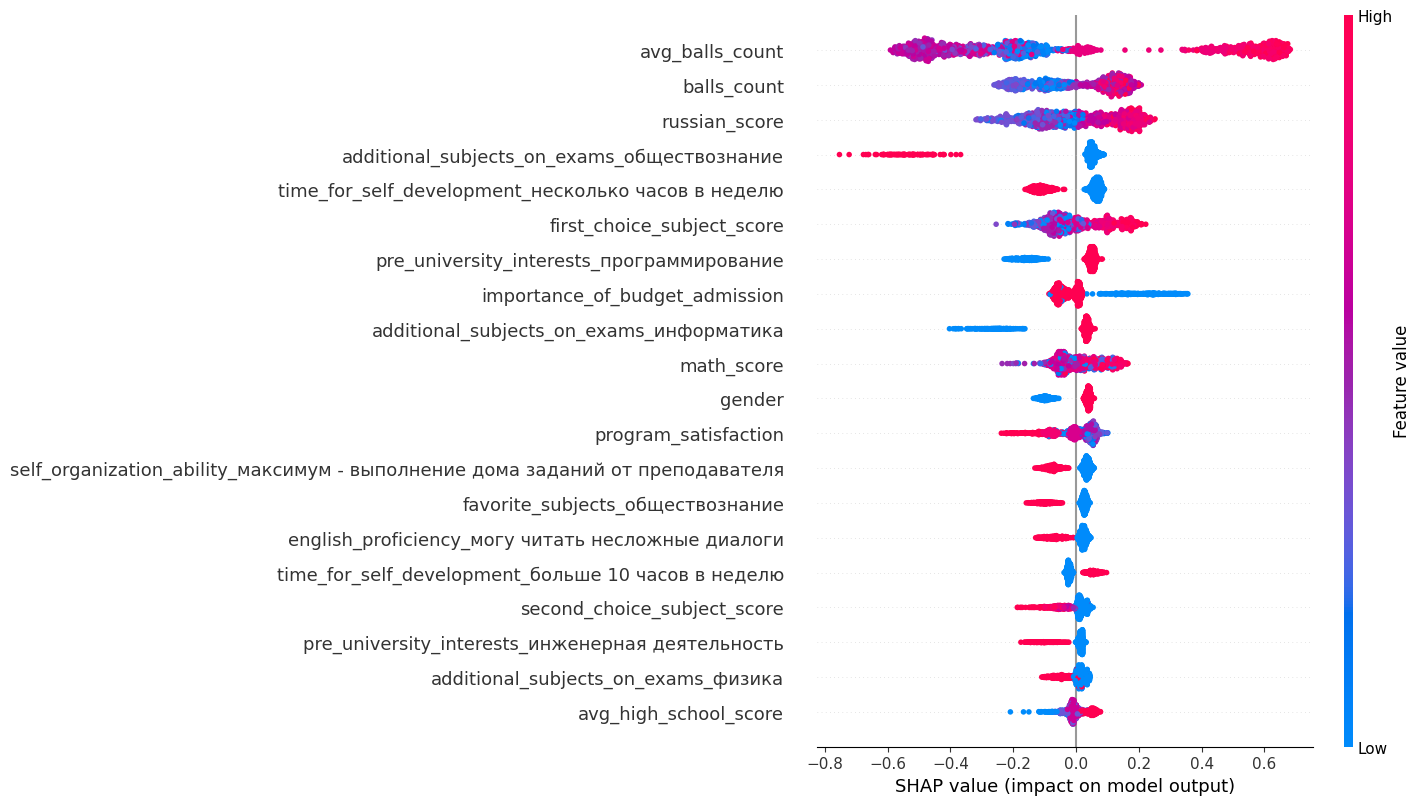

In [ ]:
# Визуализация SHAP только для IT
print("SHAP values for IT:")
shap.summary_plot(shap_values[..., it_index], X_train_shap, feature_names=X_train_shap.columns)

SHAP values for КИИБ:


/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


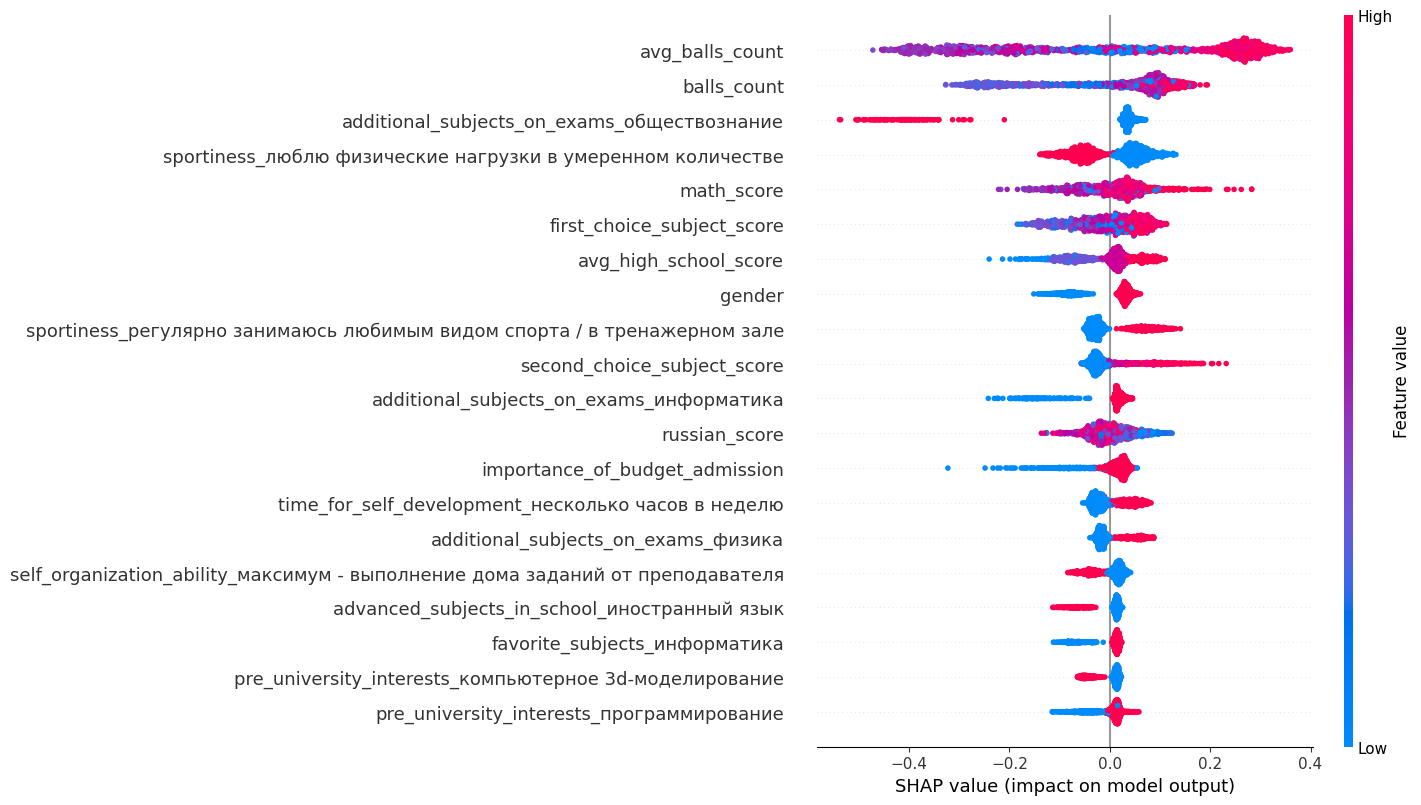

In [ ]:
# Визуализация SHAP только для КИИБ
print("SHAP values for КИИБ:")
shap.summary_plot(shap_values[..., kiib_index], X_train_shap, feature_names=X_train_shap.columns)

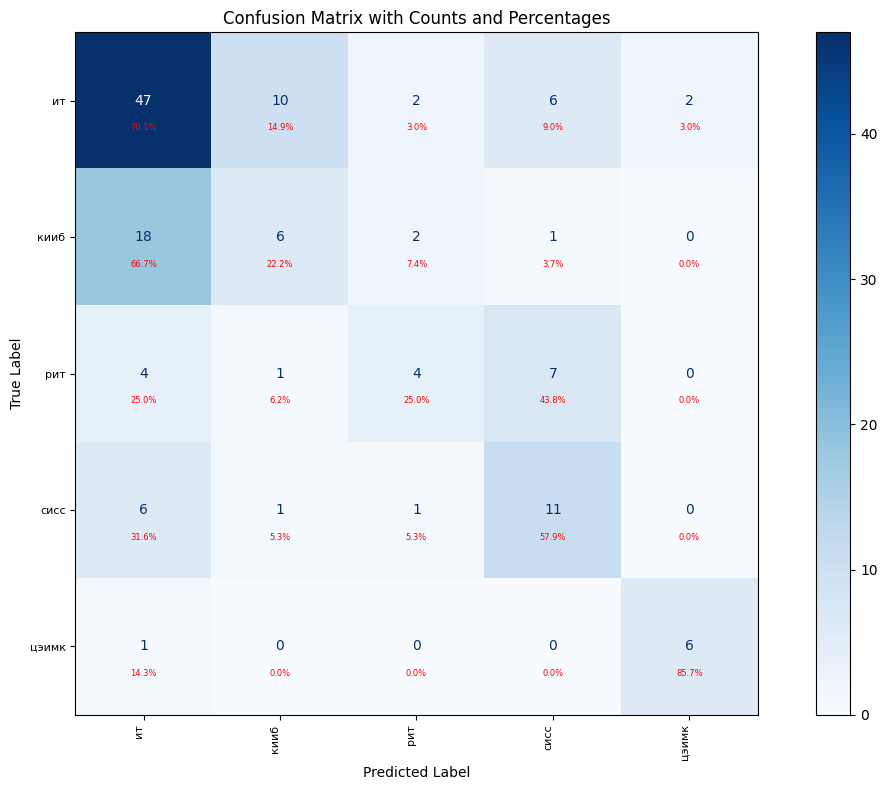

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test.values, y_pred)

# Define class labels
class_labels = [x.split()[0] for x in new_data_encoded['university_faculty'].unique()]

# Sort the class labels
class_labels.sort()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Customize the plot
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap='Blues', ax=ax, values_format='d')

# Add counts and percentages
for i in range(len(cm)):
    for j in range(len(cm)):
        count = cm[i, j]
        percentage = cm[i, j] / np.sum(cm[i]) * 100 if np.sum(cm[i]) != 0 else 0

        # # Absolute counts
        # plt.text(
        #     j, i - 0.2, f"{count}",
        #     ha="center", va="center", color="black", fontsize=8, fontweight='bold'
        # )

        # Percentages
        plt.text(
            j, i + 0.2, f"{percentage:.1f}%",
            ha="center", va="center", color="red", fontsize=6
        )

# Rotate x labels for better readability and reduce font size
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)

plt.title("Confusion Matrix with Counts and Percentages")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
new_data_encoded.to_csv('data.csv', index=False)

In [ ]:
pd.options.display.max_rows = 160

In [ ]:
model.get_feature_importance(prettified=True).to_csv('feature_important.csv', index=False)

In [ ]:
model.get_feature_importance(prettified=True)

Feature Id  Importances
0                           first_choice_subject_score     7.664540
1                                        russian_score     7.586779
2                                          balls_count     6.292922
3                                           math_score     6.041588
4                                           score_diff     5.755958
..                                                 ...          ...
149  enroll_after_hs_or_college_после отчисления из...     0.000000
150  enroll_after_hs_or_college_поступаю во второй ...     0.000000
151  enroll_after_hs_or_college_через год после око...     0.000000
152                            admission_method_другое     0.000000
153                  admission_method_целевое обучение     0.000000

[154 rows x 2 columns]

In [ ]:
a = model.get_feature_importance(prettified=True)
a[a["Importances"] > 0]["Feature Id"]

0                                          russian_score
1                                            balls_count
2                                    avg_balls_count_log
3                                        avg_balls_count
4                         importance_of_budget_admission
5                                             math_score
6                                     avg_balls_count_sq
7            additional_subjects_on_exams_обществознание
8                             first_choice_subject_score
9                                   score_subjects_ratio
10                                            score_diff
11                                  program_satisfaction
12                                                gender
13                         favorite_subjects_информатика
14              additional_subjects_on_exams_информатика
15                                     age_at_enrollment
16     sportiness_люблю физические нагрузки в умеренн...
17     english_proficiency_могу общаться в повседневн...
18                                 avg_high_school_score
19             pre_university_interests_программирование
20     english_proficiency_могу читать несложные диалоги
21     time_for_self_development_несколько часов в не...
22                   additional_subjects_on_exams_физика
23                      favorite_subjects_обществознание
24          advanced_subjects_in_school_иностранный язык
25     interest_in_extracurriculars_готов сходить на ...
26      pre_university_interests_инженерная деятельность
27                       second_choice_subject_score_log
28                              city_of_residence_москва
29                           second_choice_subject_score
30                        favorite_subjects_русский язык
31                             favorite_subjects_история
32     pre_university_interests_эксперименты (лаборат...
33                                   tutoring_experience
34     time_for_self_development_больше 10 часов в не...
35     pre_university_interests_компьютерное 3d-модел...
36     time_for_self_development_около 10 часов в неделю
37            advanced_subjects_in_school_обществознание
38     english_proficiency_могу коммуницировать с нос...
39     sportiness_регулярно занимаюсь любимым видом с...
40                          favorite_subjects_астрономия
41                          favorite_subjects_математика
42     self_organization_ability_максимум - выполнени...
43              advanced_subjects_in_school_русский язык
44                               city_of_residence_other
45                    favorite_subjects_иностранный язык
46             interest_in_extracurriculars_только учеба
47                                      olympiad_success
48     interest_in_extracurriculars_по возможности хо...
49     self_organization_ability_готов почитать неско...
50        sportiness_предпочитаю лишний раз не двигаться
51                                      visited_open_day
52     time_for_self_development_минимальное количест...
53                advanced_subjects_in_school_математика
54                                    subjects_count_log
55     english_proficiency_свободно общаюсь, глубоко ...
56                pre_university_interests_робототехника
57                          favorite_subjects_литература
58                              favorite_subjects_физика
59                     advanced_subjects_in_school_химия
60     self_organization_ability_изучу всё связанное ...
61                            favorite_subjects_биология
62     sportiness_нахожусь на профессиональном / полу...
63                               favorite_subjects_химия
64     interest_in_extracurriculars_все возможные мер...
65         additional_subjects_on_exams_иностранный язык
66                            admission_method_баллы егэ
67               advanced_subjects_in_school_информатика
68                    advanced_subjects_in_school_физика
69     english_proficiency_обладаю базовым словарным ...
70        

# Bad search

In [ ]:
x_test_df = pd.DataFrame(X_test["id"].values, columns=["id"])
y_test_df = pd.DataFrame(y_test.values, columns=["university_faculty_test"])
y_pred_df = pd.DataFrame(y_pred, columns=["university_faculty_pred"])

In [ ]:
len(x_test_df), len(y_test_df), len(y_pred_df)

(136, 136, 136)

In [ ]:
in_df = pd.concat([x_test_df, y_test_df, y_pred_df], axis=1)

In [ ]:
in_df["id"] = in_df["id"].astype(str)

In [ ]:
in_df

id  ...                            university_faculty_pred
0    6e0116ff-d3a4-4700-b27d-1fe17f20fa27  ...                        сисс (сети и системы связи)
1    aae4866e-8957-4773-b868-609d3943e6e2  ...                        сисс (сети и системы связи)
2    48f8b33c-5dd4-45d2-954e-dfc510cd454b  ...  цэимк (цифровая экономика и массовые коммуника...
3    4753bb37-abc2-4eb4-9aed-3fc3ef2cd403  ...                        сисс (сети и системы связи)
4    17bea0af-c6d9-4b66-9fac-0f1b346066f7  ...                     ит (информационные технологии)
5    4ee2141d-2a1c-4d0e-bc25-8a089f40ec77  ...   кииб (кибернетика и информационная безопасность)
6    0e9006a4-56e7-4990-8caf-52a3952e73c8  ...                     ит (информационные технологии)
7    15ff3adf-1379-4071-bd14-805559b3b050  ...                     ит (информационные технологии)
8    fa9b3202-debf-472f-aca4-4b8b29791998  ...                     ит (информационные технологии)
9    33a26e1f-79c0-456a-87fd-5484fa374586  ...                          рит (радио и телевидение)
10   179868ca-8c81-4eaf-937d-d684671e42c6  ...                     ит (информационные технологии)
11   d8c3c51f-e866-4013-b71b-0f01f2af13d9  ...   кииб (кибернетика и информационная безопасность)
12   9947fefa-5b6c-407f-987a-abedee7d6203  ...                     ит (информационные технологии)
13   5f0c3f93-a0a6-4708-bf7c-e09e5c2e64a3  ...                          рит (радио и телевидение)
14   88fca327-8332-4597-9575-7b6e5ed38750  ...                     ит (информационные технологии)
15   5d618216-61b4-4b7b-a3a5-f82e0e7eb7e3  ...                     ит (информационные технологии)
16   758112b6-373b-4fa6-a79f-52abc120a02c  ...                     ит (информационные технологии)
17   45bcc0ec-d0a4-48ad-995d-d7fd7980c04a  ...                     ит (информационные технологии)
18   7eb43b26-0128-47ff-93f2-77955b5229c7  ...                     ит (информационные технологии)
19   248fde11-f020-4af5-aef3-ed9bf1fd481b  ...                     ит (информационные технологии)
20   f0a89a61-01b7-4006-9f19-db87dc2aacd5  ...                     ит (информационные технологии)
21   0e41a8c0-32ec-42af-b7f8-662acb2791cd  ...                     ит (информационные технологии)
22   de209468-41df-43cb-b60c-f312d7985266  ...                     ит (информационные технологии)
23   b159a7c1-e3b0-415e-90d2-2a8086c24777  ...                     ит (информационные технологии)
24   cdd3d169-3e01-493f-a369-29295f9e2a87  ...                     ит (информационные технологии)
25   dd60103d-e116-456d-9109-4c73939e415b  ...                     ит (информационные технологии)
26   22967b4f-e859-4af2-a6ed-161580678276  ...                        сисс (сети и системы связи)
27   1b16f032-7f5a-45cd-8fb8-141fef78c29a  ...   кииб (кибернетика и информационная безопасность)
28   edf1f814-1743-421f-b57e-d8d12f9d162f  ...  цэимк (цифровая экономика и массовые коммуника...
29   56df6b9d-405d-40ee-9370-34c414d57040  ...                     ит (информационные технологии)
30   8edad0d2-f90c-4aa7-b9c9-cf360b509962  ...  цэимк (цифровая экономика и массовые коммуника...
31   f7cda11d-2316-4bb7-aabf-2167872f9624  ...                     ит (информационные технологии)
32   077542ed-fdbb-49fb-9afd-875a830341b0  ...                        сисс (сети и системы связи)
33   8bf45d30-2fc3-4369-8fcc-4cc4498ab84b  ...                     ит (информационные технологии)
34   eb89f782-9ea9-422f-b2de-c410c54b916a  ...                     ит (информационные технологии)
35   278c11f8-11b2-49a2-ba0f-fa109a193359  ...  цэимк (цифровая экономика и массовые коммуника...
36   8fc48cc0-53ff-4441-a794-4faaeb9ca9a6  ...   кииб (кибернетика и информационная безопасность)
37   8b987f26-a71c-4e96-b0a1-b49ed44de67c  ...                     ит (информационные технологии)
38   4827d574-9d08-4d74-b67a-34349e761d55  ...  цэимк (цифровая экономика и массовые коммуника...
39   b41169d5-e8d0-4c9a-836c-bad5ed23aa6a  ...                     ит (информационные технологии)
40   9f6f1bae-f725-45

In [ ]:
in_df[in_df["university_faculty_test"] == "кииб (кибернетика и информационная безопасность)"]

id  ...                            university_faculty_pred
10   179868ca-8c81-4eaf-937d-d684671e42c6  ...                     ит (информационные технологии)
17   45bcc0ec-d0a4-48ad-995d-d7fd7980c04a  ...                     ит (информационные технологии)
21   0e41a8c0-32ec-42af-b7f8-662acb2791cd  ...                     ит (информационные технологии)
23   b159a7c1-e3b0-415e-90d2-2a8086c24777  ...                     ит (информационные технологии)
27   1b16f032-7f5a-45cd-8fb8-141fef78c29a  ...   кииб (кибернетика и информационная безопасность)
29   56df6b9d-405d-40ee-9370-34c414d57040  ...                     ит (информационные технологии)
31   f7cda11d-2316-4bb7-aabf-2167872f9624  ...                     ит (информационные технологии)
36   8fc48cc0-53ff-4441-a794-4faaeb9ca9a6  ...   кииб (кибернетика и информационная безопасность)
52   a7cc8ec3-f7e1-4a3c-be06-e80b85492fa7  ...   кииб (кибернетика и информационная безопасность)
54   0ca5af9d-c2f6-41e5-834a-15fd154f9578  ...                     ит (информационные технологии)
64   d80357a6-da20-4e44-b533-46b8b02f39c7  ...                     ит (информационные технологии)
65   86134ce5-46a3-4b83-a9c8-767c91246e65  ...                     ит (информационные технологии)
74   39ada78f-cc08-42ea-a152-7e274d2b085e  ...   кииб (кибернетика и информационная безопасность)
76   c94e6b95-fa89-442e-89bc-41a2640f7a51  ...                     ит (информационные технологии)
81   8c312fd3-989f-4f57-aaca-363893bd9a4c  ...   кииб (кибернетика и информационная безопасность)
89   594ecc49-18bc-4fd0-95f8-cfd0cef79809  ...                     ит (информационные технологии)
91   281bd299-5def-4d7b-8bdb-2c368b54ebcb  ...                     ит (информационные технологии)
97   6a92651a-264d-4c68-a240-f2415bcaa135  ...                     ит (информационные технологии)
98   3281fc6a-d1a3-4b36-81a7-996835cbe503  ...                     ит (информационные технологии)
101  b54b29a3-987c-488b-a73c-b008478abe6a  ...                     ит (информационные технологии)
104  5c324781-370e-4b55-8748-2400c7186b2d  ...                     ит (информационные технологии)
105  fa6a58f8-e393-4f61-97a7-92ec83bf11c7  ...  цэимк (цифровая экономика и массовые коммуника...
114  194e08ef-2f8a-4687-8b02-4336167bd6e7  ...   кииб (кибернетика и информационная безопасность)
120  7bbaf61c-c0e9-41d1-8736-bc20b94464a5  ...                        сисс (сети и системы связи)
121  4a3424e8-da3a-499c-9bc8-8c0f60c52794  ...                     ит (информационные технологии)
123  bbb1460f-5a7d-4961-b0d4-12004ec98c22  ...                     ит (информационные технологии)
126  ad5a6d8a-1611-428e-8b1d-367fc5fd738c  ...                        сисс (сети и системы связи)

[27 rows x 3 columns]

In [ ]:
in_df[in_df["university_faculty_test"] == "сисс (сети и системы связи)"]

id  ...                            university_faculty_pred
1    aae4866e-8957-4773-b868-609d3943e6e2  ...                        сисс (сети и системы связи)
3    4753bb37-abc2-4eb4-9aed-3fc3ef2cd403  ...                        сисс (сети и системы связи)
6    0e9006a4-56e7-4990-8caf-52a3952e73c8  ...                     ит (информационные технологии)
13   5f0c3f93-a0a6-4708-bf7c-e09e5c2e64a3  ...                          рит (радио и телевидение)
19   248fde11-f020-4af5-aef3-ed9bf1fd481b  ...                     ит (информационные технологии)
20   f0a89a61-01b7-4006-9f19-db87dc2aacd5  ...                     ит (информационные технологии)
22   de209468-41df-43cb-b60c-f312d7985266  ...                     ит (информационные технологии)
25   dd60103d-e116-456d-9109-4c73939e415b  ...                     ит (информационные технологии)
26   22967b4f-e859-4af2-a6ed-161580678276  ...                        сисс (сети и системы связи)
40   9f6f1bae-f725-456d-b6ac-528ccc0cbbb9  ...                        сисс (сети и системы связи)
45   5a662627-9d82-4a05-b4fa-494226113fb1  ...                     ит (информационные технологии)
47   85670bdc-a476-431b-847c-a30b2c4cf7ff  ...                        сисс (сети и системы связи)
50   9eada432-f6c6-4fb3-8d9c-e1e966adf5e7  ...  цэимк (цифровая экономика и массовые коммуника...
72   cbd5680a-d758-4936-be4d-acab8fa13779  ...                          рит (радио и телевидение)
79   bacd57f7-e4ec-414e-a66f-14a5729e01ad  ...                        сисс (сети и системы связи)
80   238b6484-0d6b-4af4-93bc-256759d7d891  ...                        сисс (сети и системы связи)
87   397f06ae-82cf-4e96-8ea5-d96c4e36dd3f  ...                          рит (радио и телевидение)
88   4d370f33-2ef8-4b38-a489-6ab27131b4b3  ...   кииб (кибернетика и информационная безопасность)
113  4f7bd2e4-8e78-4048-bb3d-6d8bb24f6729  ...                     ит (информационные технологии)

[19 rows x 3 columns]

In [ ]:
data["id"] = data["id"].astype(str)

<ipython-input-1045-62e51b3c1bef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["id"] = data["id"].astype(str)


In [ ]:
pd.options.display.max_columns = 100

In [ ]:
cutted_data = data[data["id"].isin(in_df[in_df["university_faculty_test"].isin(["кииб (кибернетика и информационная безопасность)", "ит (информационные технологии)"])].id)]

In [ ]:
b = cutted_data.merge(in_df, on="id", how="inner")
b = b[b["university_faculty_pred"].isin(["кииб (кибернетика и информационная безопасность)", "ит (информационные технологии)"])]

In [ ]:
b

gender  age_at_enrollment   city_of_residence  \
0        1                 18               other   
1        1                 18               other   
2        1                 17             иваново   
4        1                 17              москва   
5        1                 18              москва   
6        1                 18               other   
7        0                 18           челябинск   
8        0                 18              брянск   
9        1                 18              москва   
11       1                 21              москва   
12       0                 18  московская область   
13       1                 18              москва   
14       1                 17            балашиха   
15       0                 18              липецк   
16       1                 17               other   
17       0                 17          красноярск   
18       0                 18               other   
19       1                 17            балашиха   
20       1                 18              москва   
21       1                 18              москва   
22       0                 19               химки   
23       1                 18              москва   
24       1                 18              москва   
25       1                 18              москва   
26       0                 18               other   
27       1                 18               other   
28       0                 17               тверь   
29       1                 18        старый оскол   
30       1                 17              москва   
31       1                 18          красноярск   
33       1                 18               other   
34       0                 18              москва   
35       0                 18               other   
36       1                 17               пенза   
37       1                 17            белгород   
38       1                 17               other   
39       1                 18               other   
40       1                 17  московская область   
42       1                 17               тверь   
43       0                 17              москва   
44       1                 17               other   
46       1                 18  московская область   
47       0                 17               other   
48       1                 17               other   
49       1                 17               other   
51       1                 18              москва   
52       1                 17          красноярск   
53       0                 20               other   
54       1                 18              москва   
56       0                 18              москва   
57       1                 17              москва   
59       0                 17              москва   
61       1                 17              москва   
62       1                 18              москва   
63       1                 18           ярославль   
64       0                 18             иваново   
65       1                 18              липецк   
66       1                 17              москва   
67       1                 18            подольск   
68       1                 18              москва   
69       1                 18              москва   
70       0                 17               other   
71       1                 18              москва   
72       1                 17         красногорск   
73       1                 17              москва   
74       0                 18            тольятти   
75       1                 18              москва   
76       0                 17               other   
77       0                 19              москва   
78       1                 17               other   
79       1                 17            балашиха   
81       1                 22              мытищи   
82       1                 18           чебоксары   
83       1                 19              москва   
85       1                 17

In [ ]:
b.to_csv('b.csv')

In [ ]:
cutted_data_2 = data[data["id"].isin(in_df[in_df["university_faculty_test"] == "ит (информационные технологии)"].id)]

In [ ]:
cutted_data_2.merge(in_df, on="id", how="inner")

gender  age_at_enrollment   city_of_residence enroll_after_hs_or_college  \
0        1                 18               other            после 11 класса   
1        1                 18               other            после 11 класса   
2        1                 17             иваново            после 11 класса   
3        1                 18              москва            после 11 класса   
4        1                 17              москва            после 11 класса   
5        1                 18              москва            после 11 класса   
6        1                 18               other            после 11 класса   
7        0                 18           челябинск            после 11 класса   
8        0                 18              брянск            после 11 класса   
9        1                 18              москва            после 11 класса   
10       1                 19              калуга            после 11 класса   
11       1                 21              москва             после колледжа   
12       0                 18  московская область            после 11 класса   
13       1                 18              москва            после 11 класса   
14       1                 17            балашиха            после 11 класса   
15       1                 17               other            после 11 класса   
16       0                 17          красноярск            после 11 класса   
17       0                 18               other            после 11 класса   
18       1                 17            балашиха            после 11 класса   
19       1                 18              москва            после 11 класса   
20       1                 18              москва            после 11 класса   
21       0                 19               химки            после 11 класса   
22       1                 18               other            после 11 класса   
23       0                 17               тверь            после 11 класса   
24       1                 18        старый оскол            после 11 класса   
25       1                 17              москва            после 11 класса   
26       1                 18          красноярск            после 11 класса   
27       1                 18             люберцы            после 11 класса   
28       1                 18               other            после 11 класса   
29       0                 18              москва            после 11 класса   
30       0                 18               other            после 11 класса   
31       1                 17               пенза            после 11 класса   
32       1                 17               other            после 11 класса   
33       1                 17  московская область            после 11 класса   
34       1                 18              москва            после 11 класса   
35       1                 17               тверь            после 11 класса   
36       0                 17              москва            после 11 класса   
37       1                 17               other            после 11 класса   
38       1                 18               other            после 11 класса   
39       1                 18  московская область            после 11 класса   
40       0                 17               other            после 11 класса   
41       1                 17               other            после 11 класса   
42       1                 17               other            после 11 класса   
43       1                 18              москва            после 11 класса   
44       1                 17          красноярск            после 11 класса   
45       0                 20               other            после 11 класса   
46       1                 17               other            после 11 класса   
47       1                 17              москва            после 11 класса   
48       1                 18              москва            после 11 класса   
49  

In [ ]:
X["id"] = X["id"].astype(str)

In [ ]:
with_cluster_data = X[X["id"].isin(in_df[in_df["university_faculty_test"].isin(["кииб (кибернетика и информационная безопасность)", "ит (информационные технологии)"])].id)]

In [ ]:
with_cluster_data

gender  age_at_enrollment  avg_high_school_score  math_score  \
23         1           0.275139               1.305214    0.867812   
32         1           0.275139              -1.026997   -0.258110   
44         1          -1.013272               1.305214    0.727072   
51         1           0.275139              -1.026997    0.867812   
58         1          -1.013272               0.139108   -1.595142   
63         1           0.275139               0.139108   -2.087733   
67         1           0.275139               0.139108   -2.509954   
76         0           0.275139               0.139108    0.727072   
115        0           0.275139               1.305214    0.375221   
163        1           0.275139              -1.026997    0.023370   
168        1           1.563550              -1.026997    0.093740   
175        1           4.140373              -3.359209    0.727072   
192        0           0.275139               1.305214   -3.002545   
208        1           0.275139               0.139108   -0.398850   
240        1          -1.013272              -1.026997    0.023370   
259        0           0.275139               1.305214    0.867812   
265        1          -1.013272              -1.026997    0.304851   
275        0          -1.013272               1.305214    1.149292   
289        0           0.275139               1.305214    0.445591   
296        1          -1.013272              -1.026997    1.430773   
297        1           0.275139               1.305214    0.727072   
306        1           0.275139              -1.026997    1.149292   
309        0           1.563550               1.305214    0.586331   
353        1           0.275139              -1.026997   -1.243292   
354        1           0.275139              -1.026997   -1.384032   
359        1           0.275139               0.139108    0.586331   
362        0           0.275139              -1.026997    0.304851   
368        1           0.275139              -2.193103   -1.876623   
406        0          -1.013272               1.305214    0.867812   
416        1           0.275139               0.139108    0.867812   
426        1          -1.013272              -1.026997   -0.117370   
428        1           0.275139               1.305214    0.867812   
429        1           0.275139               0.139108   -0.117370   
431        1           0.275139              -2.193103    0.304851   
453        0           0.275139               0.139108   -0.117370   
466        0           0.275139               1.305214   -0.961811   
487        1          -1.013272              -1.026997   -0.821071   
499        1          -1.013272               0.139108    0.445591   
515        1          -1.013272               1.305214    1.149292   
524        1           0.275139              -1.026997    0.304851   
529        1          -1.013272               0.139108    1.008552   
530        1           0.275139              -1.026997    0.164111   
540        1          -1.013272               0.139108    0.797442   
545        0          -1.013272               0.139108    0.586331   
554        1          -1.013272               0.139108   -1.384032   
562        1           0.275139               0.139108    0.164111   
569        1           0.275139               0.139108    1.008552   
590        0          -1.013272               1.305214   -0.680331   
593        1          -1.013272               0.139108    0.727072   
599        1          -1.013272               1.305214    0.586331   
621        1           0.275139               0.139108   -3.002545   
622        1           0.275139              -1.026997   -0.117370   
627        1          -1.013272              -1.026997    0.375221   
629        0           2.851962               1.305214    0.445591   
633        1           0.275139               1.305214    0.867812   
684        1          -1.013272               0.139108   -0.258110   
697        0    

In [ ]:
with_cluster_data.merge(in_df, on="id", how="inner")

gender  age_at_enrollment  avg_high_school_score  math_score  \
0        1           0.275139               1.305214    0.867812   
1        1           0.275139              -1.026997   -0.258110   
2        1          -1.013272               1.305214    0.727072   
3        1           0.275139              -1.026997    0.867812   
4        1          -1.013272               0.139108   -1.595142   
5        1           0.275139               0.139108   -2.087733   
6        1           0.275139               0.139108   -2.509954   
7        0           0.275139               0.139108    0.727072   
8        0           0.275139               1.305214    0.375221   
9        1           0.275139              -1.026997    0.023370   
10       1           1.563550              -1.026997    0.093740   
11       1           4.140373              -3.359209    0.727072   
12       0           0.275139               1.305214   -3.002545   
13       1           0.275139               0.139108   -0.398850   
14       1          -1.013272              -1.026997    0.023370   
15       0           0.275139               1.305214    0.867812   
16       1          -1.013272              -1.026997    0.304851   
17       0          -1.013272               1.305214    1.149292   
18       0           0.275139               1.305214    0.445591   
19       1          -1.013272              -1.026997    1.430773   
20       1           0.275139               1.305214    0.727072   
21       1           0.275139              -1.026997    1.149292   
22       0           1.563550               1.305214    0.586331   
23       1           0.275139              -1.026997   -1.243292   
24       1           0.275139              -1.026997   -1.384032   
25       1           0.275139               0.139108    0.586331   
26       0           0.275139              -1.026997    0.304851   
27       1           0.275139              -2.193103   -1.876623   
28       0          -1.013272               1.305214    0.867812   
29       1           0.275139               0.139108    0.867812   
30       1          -1.013272              -1.026997   -0.117370   
31       1           0.275139               1.305214    0.867812   
32       1           0.275139               0.139108   -0.117370   
33       1           0.275139              -2.193103    0.304851   
34       0           0.275139               0.139108   -0.117370   
35       0           0.275139               1.305214   -0.961811   
36       1          -1.013272              -1.026997   -0.821071   
37       1          -1.013272               0.139108    0.445591   
38       1          -1.013272               1.305214    1.149292   
39       1           0.275139              -1.026997    0.304851   
40       1          -1.013272               0.139108    1.008552   
41       1           0.275139              -1.026997    0.164111   
42       1          -1.013272               0.139108    0.797442   
43       0          -1.013272               0.139108    0.586331   
44       1          -1.013272               0.139108   -1.384032   
45       1           0.275139               0.139108    0.164111   
46       1           0.275139               0.139108    1.008552   
47       0          -1.013272               1.305214   -0.680331   
48       1          -1.013272               0.139108    0.727072   
49       1          -1.013272               1.305214    0.586331   
50       1           0.275139               0.139108   -3.002545   
51       1           0.275139              -1.026997   -0.117370   
52       1          -1.013272              -1.026997    0.375221   
53       0           2.851962               1.305214    0.445591   
54       1           0.275139               1.305214    0.867812   
55       1          -1.013272               0.139108   -0.258110   
56       0           0.275139               0.139108    0.586331   
57       1          -1.013272               1.305214    0.02

In [ ]:
data3 = with_cluster_data.merge(in_df, on="id", how="inner")

In [ ]:
data3

gender  age_at_enrollment  avg_high_school_score  math_score  \
0        1           0.275139               1.305214    0.867812   
1        1           0.275139              -1.026997   -0.258110   
2        1          -1.013272               1.305214    0.727072   
3        1           0.275139              -1.026997    0.867812   
4        1          -1.013272               0.139108   -1.595142   
5        1           0.275139               0.139108   -2.087733   
6        1           0.275139               0.139108   -2.509954   
7        0           0.275139               0.139108    0.727072   
8        0           0.275139               1.305214    0.375221   
9        1           0.275139              -1.026997    0.023370   
10       1           1.563550              -1.026997    0.093740   
11       1           4.140373              -3.359209    0.727072   
12       0           0.275139               1.305214   -3.002545   
13       1           0.275139               0.139108   -0.398850   
14       1          -1.013272              -1.026997    0.023370   
15       0           0.275139               1.305214    0.867812   
16       1          -1.013272              -1.026997    0.304851   
17       0          -1.013272               1.305214    1.149292   
18       0           0.275139               1.305214    0.445591   
19       1          -1.013272              -1.026997    1.430773   
20       1           0.275139               1.305214    0.727072   
21       1           0.275139              -1.026997    1.149292   
22       0           1.563550               1.305214    0.586331   
23       1           0.275139              -1.026997   -1.243292   
24       1           0.275139              -1.026997   -1.384032   
25       1           0.275139               0.139108    0.586331   
26       0           0.275139              -1.026997    0.304851   
27       1           0.275139              -2.193103   -1.876623   
28       0          -1.013272               1.305214    0.867812   
29       1           0.275139               0.139108    0.867812   
30       1          -1.013272              -1.026997   -0.117370   
31       1           0.275139               1.305214    0.867812   
32       1           0.275139               0.139108   -0.117370   
33       1           0.275139              -2.193103    0.304851   
34       0           0.275139               0.139108   -0.117370   
35       0           0.275139               1.305214   -0.961811   
36       1          -1.013272              -1.026997   -0.821071   
37       1          -1.013272               0.139108    0.445591   
38       1          -1.013272               1.305214    1.149292   
39       1           0.275139              -1.026997    0.304851   
40       1          -1.013272               0.139108    1.008552   
41       1           0.275139              -1.026997    0.164111   
42       1          -1.013272               0.139108    0.797442   
43       0          -1.013272               0.139108    0.586331   
44       1          -1.013272               0.139108   -1.384032   
45       1           0.275139               0.139108    0.164111   
46       1           0.275139               0.139108    1.008552   
47       0          -1.013272               1.305214   -0.680331   
48       1          -1.013272               0.139108    0.727072   
49       1          -1.013272               1.305214    0.586331   
50       1           0.275139               0.139108   -3.002545   
51       1           0.275139              -1.026997   -0.117370   
52       1          -1.013272              -1.026997    0.375221   
53       0           2.851962               1.305214    0.445591   
54       1           0.275139               1.305214    0.867812   
55       1          -1.013272               0.139108   -0.258110   
56       0           0.275139               0.139108    0.586331   
57       1          -1.013272               1.305214    0.02

In [ ]:
data3.to_csv('data4.csv', index=False)

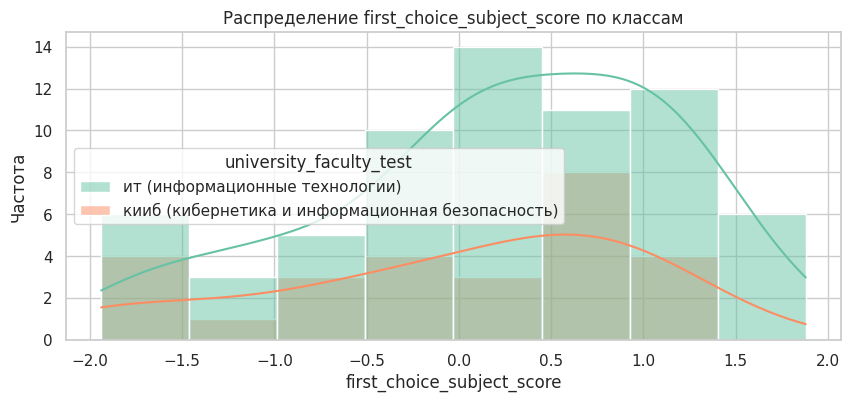

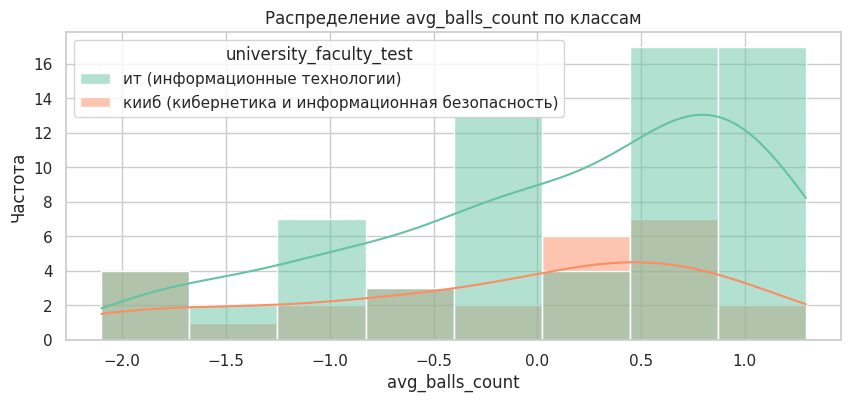

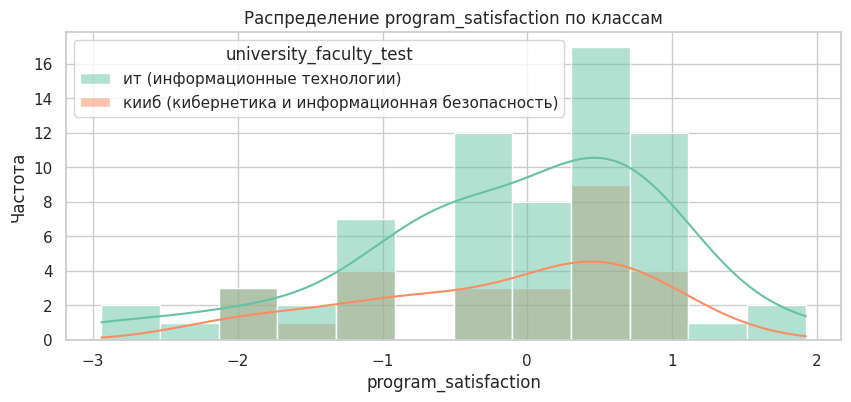

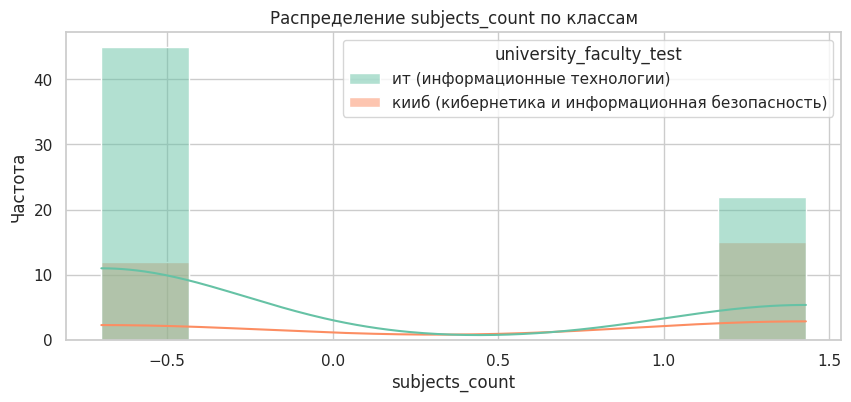

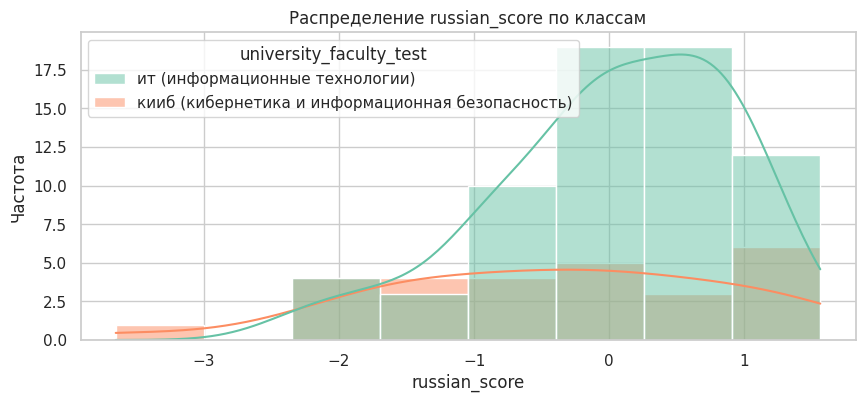

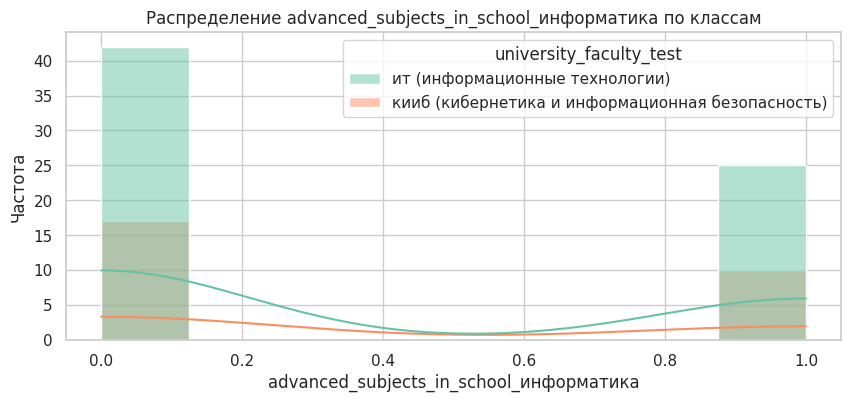

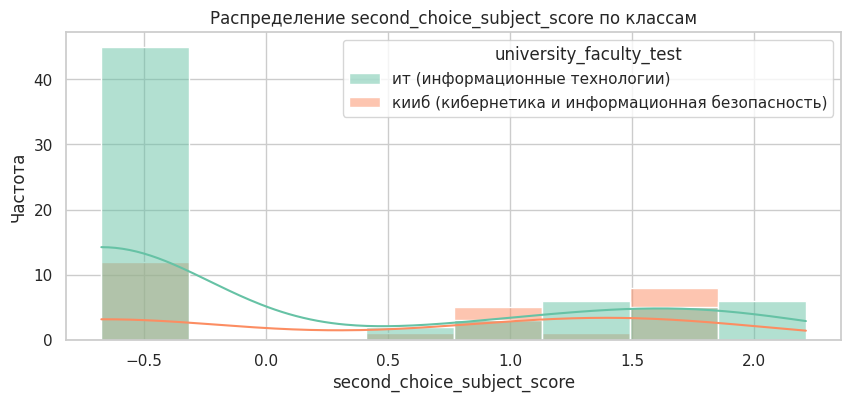

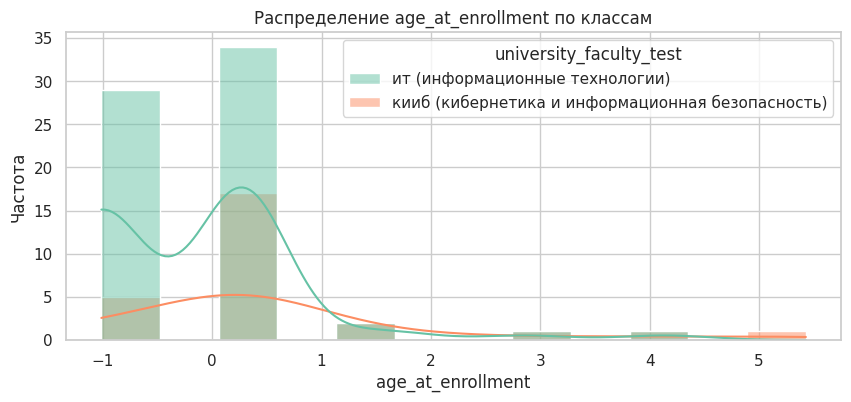

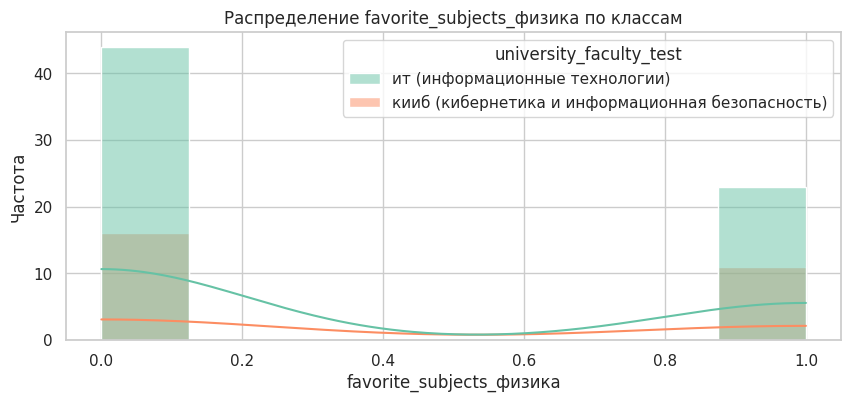

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список признаков с наибольшей разницей
features = [
    "first_choice_subject_score",
    "avg_balls_count",
    "program_satisfaction",
    "subjects_count",
    "russian_score",
    "advanced_subjects_in_school_информатика",
    "second_choice_subject_score",
    "age_at_enrollment",
    "favorite_subjects_физика"
]

# Настройка стиля
sns.set(style="whitegrid")

for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data3, x=feature, hue="university_faculty_test", kde=True, palette="Set2")
    plt.title(f"Распределение {feature} по классам")
    plt.xlabel(feature)
    plt.ylabel("Частота")
    plt.show()


# random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Определяем параметры для поиска
param_dist = {
    'n_estimators': [1000],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [2],
    'bootstrap': [True]
}

# Инициализируем модель RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Инициализируем RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Обучаем модель с RandomizedSearchCV
random_search.fit(X_train.drop('id', axis=1).values, y_train.values)

# Лучшие параметры
print("Best parameters found: ", random_search.best_params_)

# Лучшая модель
best_rf_model = random_search.best_estimator_


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


In [64]:
rf_pred = best_rf_model.predict(X_test.drop('id', axis=1).values)
accuracy = accuracy_score(y_test.values, rf_pred)
f1 = f1_score(y_test.values, rf_pred, average="macro")

# Выводим результаты
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.5441176470588235
F1 Score: 0.371089842057584


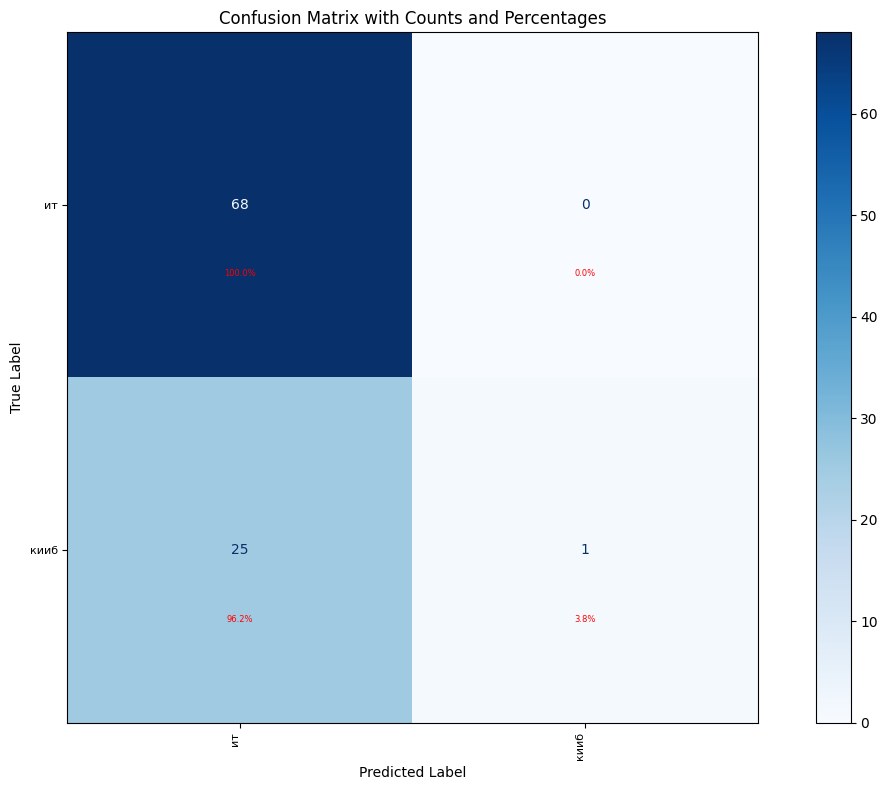

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Define class labels
class_labels = [x.split()[0] for x in new_data_encoded['university_faculty'].unique()]

# Sort the class labels
class_labels.sort()

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Customize the plot
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap='Blues', ax=ax, values_format='d')

# Add counts and percentages
for i in range(len(cm)):
    for j in range(len(cm)):
        count = cm[i, j]
        percentage = cm[i, j] / np.sum(cm[i]) * 100 if np.sum(cm[i]) != 0 else 0

        # # Absolute counts
        # plt.text(
        #     j, i - 0.2, f"{count}",
        #     ha="center", va="center", color="black", fontsize=8, fontweight='bold'
        # )

        # Percentages
        plt.text(
            j, i + 0.2, f"{percentage:.1f}%",
            ha="center", va="center", color="red", fontsize=6
        )

# Rotate x labels for better readability and reduce font size
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)

plt.title("Confusion Matrix with Counts and Percentages")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
# Получаем важность признаков
feature_importances = best_rf_model.feature_importances_
print(len(feature_importances), len(X))
# Создаем DataFrame с важностью признаков
importance_df = pd.DataFrame({
    'Feature': X.drop(['id'], axis=1).columns,
    'Importance': feature_importances
})

# Сортируем по важности
pd.options.display.max_rows = 100
importance_df.sort_values(by='Importance', ascending=False)

154 1358


Feature  Importance
148                                avg_balls_count_log    0.070694
14                                     avg_balls_count    0.069492
151                                 avg_balls_count_sq    0.069217
153                               score_subjects_ratio    0.061232
13                                         balls_count    0.059758
..                                                 ...         ...
113  enroll_after_hs_or_college_после 1 курса спбгмту     0.000000
119  enroll_after_hs_or_college_через год после око...    0.000000
40             additional_subjects_on_exams_астрономия    0.000000
118  enroll_after_hs_or_college_поступаю во второй ...    0.000000
115         enroll_after_hs_or_college_после 13 сласса    0.000000

[154 rows x 2 columns]